# # Tree Cover, Green Space, and Air Quality Correlation to Acute Respiratory Illnesses in Cleveland, Los Angeles, New York, and Tampa (2019-2020 Data) (Part 1)

1. Data Wrangling

In [176]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import pickle
import seaborn as sns
%matplotlib inline
import string
import collections

from pandas.plotting import register_matplotlib_converters
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction import text
import warnings
warnings.filterwarnings('ignore')

In [177]:
import os
os.getcwd()

'C:\\Users\\yuvem\\Downloads'

#### Importing Datasets

#### Part 1: AQI values

I. Cleveland-Elyria, OH

To accurately describe changes in air quality for locations and time periods with biases in the monitoring network, we apply rolling window regression. This recursively calculates the change in pollutant concentration as a function of time, which can be used as a proxy for the true trend. This also more accurately reflects the true trend than averaging the time series. It can smooth random short-term variations. We will use simple moving average (SMA), cumulative moving average (CMA), exponential moving average, and estimating trends in NO2, CO, Ozone.

In [178]:
df_cle = pd.read_csv(r'C:\Users\yuvem\OneDrive\Documents\GitHub\Tree-Canopy-Percentage-Air-Quality-Correlation-to-Acute-Resp-Illnesses-in-Ohio-cities-Project_\ad_viz_tile_data_cle_.csv')
df_cle.head()

Date   AQI Value Main Pollutant       Site Name      Site ID Source
0  01/01/2019          39          PM2.5  GT Craig NCore  39-035-0060    AQS
1  01/02/2019          55          PM2.5  GT Craig NCore  39-035-0060    AQS
2  01/03/2019          48          PM2.5  GT Craig NCore  39-035-0060    AQS
3  01/04/2019          66          PM2.5  GT Craig NCore  39-035-0060    AQS
4  01/05/2019          83          PM2.5  GT Craig NCore  39-035-0060    AQS

In [179]:
df_cle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            731 non-null    object
 1    AQI Value      731 non-null    int64 
 2   Main Pollutant  731 non-null    object
 3   Site Name       731 non-null    object
 4   Site ID         731 non-null    object
 5   Source          731 non-null    object
dtypes: int64(1), object(5)
memory usage: 34.4+ KB


In [180]:
df_cle.shape

(731, 6)

In [181]:
df_cle.isnull().sum()

Date              0
 AQI Value        0
Main Pollutant    0
Site Name         0
Site ID           0
Source            0
dtype: int64

In [182]:
df_cle['Date']= pd.to_datetime(df_cle['Date'])

In [183]:
# calculate the yearly average CO AQI 
df_cle['AQI_Value'] = df_cle.mean(axis=1)

# drop columns containing monthly values
df_aqi_cle = df_cle[['AQI_Value']]

# visualize the first 5 columns
df_aqi_cle.head()

AQI_Value
0       39.0
1       55.0
2       48.0
3       66.0
4       83.0

II. Los Angeles-Long-Beach-Anaheim, CA

In [184]:
df_la = pd.read_csv(r'C:\Users\yuvem\OneDrive\Documents\GitHub\Tree-Canopy-Percentage-Air-Quality-Correlation-to-Acute-Resp-Illnesses-in-Ohio-cities-Project_\ad_viz_tile_data_la.csv')
df_la.head()

Date   AQI Value Main Pollutant                       Site Name  \
0  01/01/2019          67          PM2.5   Los Angeles-North Main Street   
1  01/02/2019          93          PM2.5  Long Beach-Route 710 Near Road   
2  01/03/2019          67          PM2.5  Long Beach-Route 710 Near Road   
3  01/04/2019          85          PM2.5  Long Beach-Route 710 Near Road   
4  01/05/2019          83          PM2.5  Long Beach-Route 710 Near Road   

       Site ID Source  
0  06-037-1103    AQS  
1  06-037-4008    AQS  
2  06-037-4008    AQS  
3  06-037-4008    AQS  
4  06-037-4008    AQS

In [185]:
df_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            731 non-null    object
 1    AQI Value      731 non-null    int64 
 2   Main Pollutant  731 non-null    object
 3   Site Name       731 non-null    object
 4   Site ID         731 non-null    object
 5   Source          731 non-null    object
dtypes: int64(1), object(5)
memory usage: 34.4+ KB


In [186]:
df_la.shape

(731, 6)

In [187]:
df_la.isnull().sum()

Date              0
 AQI Value        0
Main Pollutant    0
Site Name         0
Site ID           0
Source            0
dtype: int64

In [188]:
df_la['Date']= pd.to_datetime(df_la['Date'])

In [189]:
# calculate the yearly average CO AQI 
df_la['AQI_Value'] = df_la.mean(axis=1)

# drop columns containing monthly values
df_aqi_la = df_la[['AQI_Value']]

# visualize the first 5 columns
df_aqi_la.head()

AQI_Value
0       67.0
1       93.0
2       67.0
3       85.0
4       83.0

III. New York-Newark-Jersey City, NY-NJ-PA

In [190]:
df_ny = pd.read_csv(r'C:\Users\yuvem\OneDrive\Documents\GitHub\Tree-Canopy-Percentage-Air-Quality-Correlation-to-Acute-Resp-Illnesses-in-Ohio-cities-Project_\ad_viz_tile_data_ny.csv')
df_ny.head()

Date   AQI Value Main Pollutant        Site Name      Site ID Source
0  01/01/2019          45          PM2.5  MASPETH LIBRARY  36-081-0120    AQS
1  01/02/2019          64          PM2.5            PS 19  36-061-0128    AQS
2  01/03/2019          54          PM2.5            PS 19  36-061-0128    AQS
3  01/04/2019          60          PM2.5    Elizabeth Lab  34-039-0004    AQS
4  01/05/2019          50          PM2.5  DIVISION STREET  36-061-0134    AQS

In [191]:
df_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            731 non-null    object
 1    AQI Value      731 non-null    int64 
 2   Main Pollutant  731 non-null    object
 3   Site Name       731 non-null    object
 4   Site ID         731 non-null    object
 5   Source          731 non-null    object
dtypes: int64(1), object(5)
memory usage: 34.4+ KB


In [192]:
df_ny.shape

(731, 6)

In [193]:
df_ny.isnull().sum()

Date              0
 AQI Value        0
Main Pollutant    0
Site Name         0
Site ID           0
Source            0
dtype: int64

In [194]:
df_ny['Date']= pd.to_datetime(df_ny['Date'])

In [195]:
# calculate the yearly average CO AQI 
df_ny['AQI_Value'] = df_ny.mean(axis=1)

# drop columns containing monthly values
df_aqi_ny = df_ny[['AQI_Value']]

# visualize the first 5 columns
df_aqi_ny.head()

AQI_Value
0       45.0
1       64.0
2       54.0
3       60.0
4       50.0

IV. Tampa-St. Petersburg-Clearwater, FL

In [196]:
df_tampa = pd.read_csv(r'C:\Users\yuvem\OneDrive\Documents\GitHub\Tree-Canopy-Percentage-Air-Quality-Correlation-to-Acute-Resp-Illnesses-in-Ohio-cities-Project_\ad_viz_tile_data_tampa.csv')
df_tampa.head()

Date   AQI Value Main Pollutant                    Site Name  \
0  01/01/2019          66          PM2.5  USMC Reserve Center (Gandy)   
1  01/02/2019          51           PM10             County Motorpool   
2  01/03/2019          33          PM2.5  USMC Reserve Center (Gandy)   
3  01/04/2019          40          Ozone                      Holiday   
4  01/05/2019          40          Ozone                      Holiday   

       Site ID Source  
0  12-057-1065    AQS  
1  12-103-3004    AQS  
2  12-057-1065    AQS  
3  12-101-2001    AQS  
4  12-101-2001    AQS

In [197]:
df_tampa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            731 non-null    object
 1    AQI Value      731 non-null    int64 
 2   Main Pollutant  731 non-null    object
 3   Site Name       731 non-null    object
 4   Site ID         731 non-null    object
 5   Source          731 non-null    object
dtypes: int64(1), object(5)
memory usage: 34.4+ KB


In [198]:
df_tampa.shape

(731, 6)

In [199]:
df_tampa.isnull().sum()

Date              0
 AQI Value        0
Main Pollutant    0
Site Name         0
Site ID           0
Source            0
dtype: int64

In [200]:
df_tampa['Date']= pd.to_datetime(df_tampa['Date'])

In [201]:
# calculate the yearly average CO AQI 
df_tampa['AQI_Value'] = df_tampa.mean(axis=1)

# drop columns containing monthly values
df_aqi_tampa = df_tampa[['AQI_Value']]

# visualize the first 5 columns
df_aqi_tampa.head()

AQI_Value
0       66.0
1       51.0
2       33.0
3       40.0
4       40.0

### Rows and Columns for Main Pollutant PM2.5

In [202]:
pm25_cle = df_cle[df_cle["Main Pollutant"] == "PM2.5"]
pm25_cle.shape

(415, 7)

In [203]:
pm25_la = df_la[df_la["Main Pollutant"] == "PM2.5"]
pm25_la.shape

(258, 7)

In [204]:
pm25_ny = df_ny[df_ny["Main Pollutant"] == "PM2.5"]
pm25_ny.shape

(348, 7)

In [205]:
pm25_tampa = df_tampa[df_tampa["Main Pollutant"] == "PM2.5"]
pm25_tampa.shape

(358, 7)

### Merge the two dataframes - Outer merge

In [206]:
outer_merged_1 = pd.merge(df_cle, df_la, how="outer", on=["AQI_Value", "Main Pollutant"] )

In [207]:
outer_merged_1.head()

Date_x   AQI Value_x Main Pollutant     Site Name_x    Site ID_x  \
0 2019-01-01          39.0          PM2.5  GT Craig NCore  39-035-0060   
1 2019-10-23          39.0          PM2.5  GT Craig NCore  39-035-0060   
2 2019-01-02          55.0          PM2.5  GT Craig NCore  39-035-0060   
3 2019-01-02          55.0          PM2.5  GT Craig NCore  39-035-0060   
4 2019-01-02          55.0          PM2.5  GT Craig NCore  39-035-0060   

  Source_x  AQI_Value     Date_y   AQI Value_y  \
0      AQS       39.0        NaT           NaN   
1      AQS       39.0        NaT           NaN   
2      AQS       55.0 2019-02-22          55.0   
3      AQS       55.0 2020-02-09          55.0   
4      AQS       55.0 2020-10-24          55.0   

                      Site Name_y    Site ID_y Source_y  
0                             NaN          NaN      NaN  
1                             NaN          NaN      NaN  
2  Long Beach-Route 710 Near Road  06-037-4008      AQS  
3   Los Angeles-North Main Street  06-037-1103      AQS  
4                        Glendora  06-037-0016      AQS

In [208]:
outer_merged_2 = pd.merge(df_ny, df_tampa
                          , how="outer", on=["AQI_Value", "Main Pollutant"] )

In [209]:
outer_merged_2.head()

Date_x   AQI Value_x Main Pollutant      Site Name_x    Site ID_x  \
0 2019-01-01          45.0          PM2.5  MASPETH LIBRARY  36-081-0120   
1 2019-01-01          45.0          PM2.5  MASPETH LIBRARY  36-081-0120   
2 2019-01-01          45.0          PM2.5  MASPETH LIBRARY  36-081-0120   
3 2019-01-01          45.0          PM2.5  MASPETH LIBRARY  36-081-0120   
4 2019-01-01          45.0          PM2.5  MASPETH LIBRARY  36-081-0120   

  Source_x  AQI_Value     Date_y   AQI Value_y  \
0      AQS       45.0 2019-01-29          45.0   
1      AQS       45.0 2019-03-02          45.0   
2      AQS       45.0 2019-06-13          45.0   
3      AQS       45.0 2019-07-02          45.0   
4      AQS       45.0 2019-08-10          45.0   

                         Site Name_y    Site ID_y Source_y  
0                        Azalea Park  12-103-0018      AQS  
1        USMC Reserve Center (Gandy)  12-057-1065      AQS  
2  John Chesnut Sr. Park - East Lake  12-103-5002      AQS  
3  John Chesnut Sr. Park - East Lake  12-103-5002      AQS  
4  John Chesnut Sr. Park - East Lake  12-103-5002      AQS

### Complete merge of dataframes with Main Pollutant PM2.5

In [210]:
pm25_df_1 = pm25_cle.join(pm25_la, lsuffix='_left', rsuffix='_right')
pm25_df_1.head()

Date_left   AQI Value_left Main Pollutant_left  Site Name_left  \
0 2019-01-01               39               PM2.5  GT Craig NCore   
1 2019-01-02               55               PM2.5  GT Craig NCore   
2 2019-01-03               48               PM2.5  GT Craig NCore   
3 2019-01-04               66               PM2.5  GT Craig NCore   
4 2019-01-05               83               PM2.5  GT Craig NCore   

  Site ID_left Source_left  AQI_Value_left Date_right   AQI Value_right  \
0  39-035-0060         AQS            39.0 2019-01-01              67.0   
1  39-035-0060         AQS            55.0 2019-01-02              93.0   
2  39-035-0060         AQS            48.0 2019-01-03              67.0   
3  39-035-0060         AQS            66.0 2019-01-04              85.0   
4  39-035-0060         AQS            83.0 2019-01-05              83.0   

  Main Pollutant_right                 Site Name_right Site ID_right  \
0                PM2.5   Los Angeles-North Main Street   06-037-1103   
1                PM2.5  Long Beach-Route 710 Near Road   06-037-4008   
2                PM2.5  Long Beach-Route 710 Near Road   06-037-4008   
3                PM2.5  Long Beach-Route 710 Near Road   06-037-4008   
4                PM2.5  Long Beach-Route 710 Near Road   06-037-4008   

  Source_right  AQI_Value_right  
0          AQS             67.0  
1          AQS             93.0  
2          AQS             67.0  
3          AQS             85.0  
4          AQS             83.0

In [211]:
pm25_df_2 = pm25_ny.join(pm25_tampa, lsuffix='_left', rsuffix='_right')
pm25_df_2.head()

Date_left   AQI Value_left Main Pollutant_left   Site Name_left  \
0 2019-01-01               45               PM2.5  MASPETH LIBRARY   
1 2019-01-02               64               PM2.5            PS 19   
2 2019-01-03               54               PM2.5            PS 19   
3 2019-01-04               60               PM2.5    Elizabeth Lab   
4 2019-01-05               50               PM2.5  DIVISION STREET   

  Site ID_left Source_left  AQI_Value_left Date_right   AQI Value_right  \
0  36-081-0120         AQS            45.0 2019-01-01              66.0   
1  36-061-0128         AQS            64.0        NaT               NaN   
2  36-061-0128         AQS            54.0 2019-01-03              33.0   
3  34-039-0004         AQS            60.0        NaT               NaN   
4  36-061-0134         AQS            50.0        NaT               NaN   

  Main Pollutant_right              Site Name_right Site ID_right  \
0                PM2.5  USMC Reserve Center (Gandy)   12-057-1065   
1                  NaN                          NaN           NaN   
2                PM2.5  USMC Reserve Center (Gandy)   12-057-1065   
3                  NaN                          NaN           NaN   
4                  NaN                          NaN           NaN   

  Source_right  AQI_Value_right  
0          AQS             66.0  
1          NaN              NaN  
2          AQS             33.0  
3          NaN              NaN  
4          NaN              NaN

## Plotting Moving Average for all AQI Pollutants for Cincinnati and Cleveland

In [212]:
df_la2 = pd.read_csv(r'C:\Users\yuvem\OneDrive\Documents\GitHub\Tree-Canopy-Percentage-Air-Quality-Correlation-to-Acute-Resp-Illnesses-in-Ohio-cities-Project_\ad_viz_tile_data_la.csv', parse_dates=['Date'], index_col=['Date'], na_values=['.'], encoding='utf-8')
df_la2.head()

AQI Value Main Pollutant                       Site Name  \
Date                                                                    
2019-01-01          67          PM2.5   Los Angeles-North Main Street   
2019-01-02          93          PM2.5  Long Beach-Route 710 Near Road   
2019-01-03          67          PM2.5  Long Beach-Route 710 Near Road   
2019-01-04          85          PM2.5  Long Beach-Route 710 Near Road   
2019-01-05          83          PM2.5  Long Beach-Route 710 Near Road   

                Site ID Source  
Date                            
2019-01-01  06-037-1103    AQS  
2019-01-02  06-037-4008    AQS  
2019-01-03  06-037-4008    AQS  
2019-01-04  06-037-4008    AQS  
2019-01-05  06-037-4008    AQS

In [213]:
# calculate the yearly average AQI 
df_la2['AQI_Value'] = df_la2.mean(axis=1)

# drop columns containing monthly values
df_aqi_la2 = df_la2[['AQI_Value']]

# visualize the first 5 columns
df_aqi_la2.head()

AQI_Value
Date                 
2019-01-01       67.0
2019-01-02       93.0
2019-01-03       67.0
2019-01-04       85.0
2019-01-05       83.0

In [214]:
df_aqi_la2.rename({'AQI_Value': 'AQI Value LA'}, axis=1, inplace=True)

In [215]:
df_aqi_la2.head()

AQI Value LA
Date                    
2019-01-01          67.0
2019-01-02          93.0
2019-01-03          67.0
2019-01-04          85.0
2019-01-05          83.0

In [216]:
df_cle2 = pd.read_csv(r'C:\Users\yuvem\OneDrive\Documents\GitHub\Tree-Canopy-Percentage-Air-Quality-Correlation-to-Acute-Resp-Illnesses-in-Ohio-cities-Project_\ad_viz_tile_data_cle_.csv', parse_dates=['Date'], index_col=['Date'], na_values=['.'], encoding='utf-8')
df_cle2.head()

AQI Value Main Pollutant       Site Name      Site ID Source
Date                                                                     
2019-01-01          39          PM2.5  GT Craig NCore  39-035-0060    AQS
2019-01-02          55          PM2.5  GT Craig NCore  39-035-0060    AQS
2019-01-03          48          PM2.5  GT Craig NCore  39-035-0060    AQS
2019-01-04          66          PM2.5  GT Craig NCore  39-035-0060    AQS
2019-01-05          83          PM2.5  GT Craig NCore  39-035-0060    AQS

In [217]:
# calculate the yearly average AQI 
df_cle2['AQI_Value'] = df_cle2.mean(axis=1)

# drop columns containing monthly values
df_aqi_cle2 = df_cle2[['AQI_Value']]

# visualize the first 5 columns
df_aqi_cle2.head()

AQI_Value
Date                 
2019-01-01       39.0
2019-01-02       55.0
2019-01-03       48.0
2019-01-04       66.0
2019-01-05       83.0

In [218]:
df_aqi_cle2.rename({'AQI_Value': 'AQI Value CLE'}, axis=1, inplace=True)

In [219]:
df_aqi_cle2.head()

AQI Value CLE
Date                     
2019-01-01           39.0
2019-01-02           55.0
2019-01-03           48.0
2019-01-04           66.0
2019-01-05           83.0

In [220]:
df_ny2 = pd.read_csv(r'C:\Users\yuvem\OneDrive\Documents\GitHub\Tree-Canopy-Percentage-Air-Quality-Correlation-to-Acute-Resp-Illnesses-in-Ohio-cities-Project_\ad_viz_tile_data_ny.csv', parse_dates=['Date'], index_col=['Date'], na_values=['.'], encoding='utf-8')
df_ny2.head()

AQI Value Main Pollutant        Site Name      Site ID Source
Date                                                                      
2019-01-01          45          PM2.5  MASPETH LIBRARY  36-081-0120    AQS
2019-01-02          64          PM2.5            PS 19  36-061-0128    AQS
2019-01-03          54          PM2.5            PS 19  36-061-0128    AQS
2019-01-04          60          PM2.5    Elizabeth Lab  34-039-0004    AQS
2019-01-05          50          PM2.5  DIVISION STREET  36-061-0134    AQS

In [221]:
# calculate the yearly average AQI 
df_ny2['AQI_Value'] = df_ny2.mean(axis=1)

# drop columns containing monthly values
df_aqi_ny2 = df_ny2[['AQI_Value']]

# visualize the first 5 columns
df_aqi_ny2.head()

AQI_Value
Date                 
2019-01-01       45.0
2019-01-02       64.0
2019-01-03       54.0
2019-01-04       60.0
2019-01-05       50.0

In [222]:
df_aqi_ny2.rename({'AQI_Value': 'AQI Value NY'}, axis=1, inplace=True)

In [223]:
df_aqi_ny2.head()

AQI Value NY
Date                    
2019-01-01          45.0
2019-01-02          64.0
2019-01-03          54.0
2019-01-04          60.0
2019-01-05          50.0

In [224]:
df_tampa2 = pd.read_csv(r'C:\Users\yuvem\OneDrive\Documents\GitHub\Tree-Canopy-Percentage-Air-Quality-Correlation-to-Acute-Resp-Illnesses-in-Ohio-cities-Project_\ad_viz_tile_data_tampa.csv', parse_dates=['Date'], index_col=['Date'], na_values=['.'], encoding='utf-8')
df_tampa2.head()

AQI Value Main Pollutant                    Site Name  \
Date                                                                 
2019-01-01          66          PM2.5  USMC Reserve Center (Gandy)   
2019-01-02          51           PM10             County Motorpool   
2019-01-03          33          PM2.5  USMC Reserve Center (Gandy)   
2019-01-04          40          Ozone                      Holiday   
2019-01-05          40          Ozone                      Holiday   

                Site ID Source  
Date                            
2019-01-01  12-057-1065    AQS  
2019-01-02  12-103-3004    AQS  
2019-01-03  12-057-1065    AQS  
2019-01-04  12-101-2001    AQS  
2019-01-05  12-101-2001    AQS

In [225]:
# calculate the yearly average AQI 
df_tampa2['AQI_Value'] = df_tampa2.mean(axis=1)

# drop columns containing monthly values
df_aqi_tampa2 = df_tampa2[['AQI_Value']]

# visualize the first 5 columns
df_aqi_tampa2.head()

AQI_Value
Date                 
2019-01-01       66.0
2019-01-02       51.0
2019-01-03       33.0
2019-01-04       40.0
2019-01-05       40.0

In [226]:
df_aqi_tampa2.rename({'AQI_Value': 'AQI Value TPA'}, axis=1, inplace=True)

In [227]:
df_aqi_tampa2.head()

AQI Value TPA
Date                     
2019-01-01           66.0
2019-01-02           51.0
2019-01-03           33.0
2019-01-04           40.0
2019-01-05           40.0

In [228]:
from functools import reduce
import pandas as pd

dfs = [df_aqi_cle2,df_aqi_la2,df_aqi_ny2,df_aqi_tampa2]
nan_value=0

merged = reduce(lambda df_left,df_right: pd.merge(df_left, df_right, 
                                              left_index=True, right_index=True, 
                                              how='inner'), dfs).fillna(nan_value)

In [229]:
merged.head()

AQI Value CLE  AQI Value LA  AQI Value NY  AQI Value TPA
Date                                                                
2019-01-01           39.0          67.0          45.0           66.0
2019-01-02           55.0          93.0          64.0           51.0
2019-01-03           48.0          67.0          54.0           33.0
2019-01-04           66.0          85.0          60.0           40.0
2019-01-05           83.0          83.0          50.0           40.0

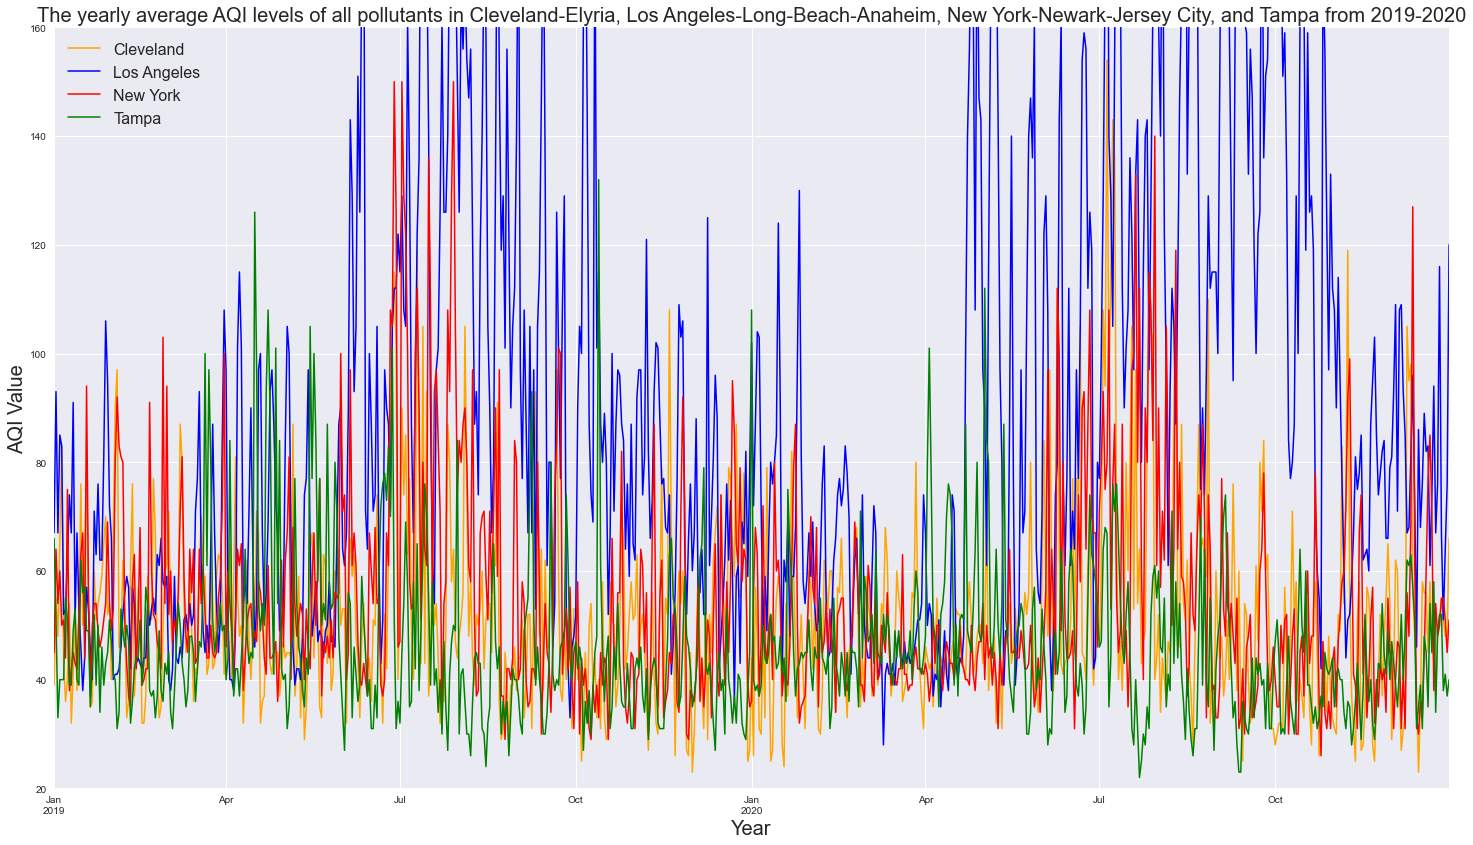

In [230]:
plt.style.use('seaborn')
plt.figure(figsize=(25,14))

# line plot - the yearly average AQI in Cleveland-Elyria, OH and Los Angeles, CA
ax1 = merged['AQI Value CLE'].plot(color='orange', linewidth=1.5, grid=True, label='Cleveland')
ax2 = merged['AQI Value LA'].plot(color='blue', linewidth=1.5, grid=True, label='Los Angeles')
ax3 = merged['AQI Value NY'].plot(color='red', linewidth=1.5, grid=True, label='New York')
ax4 = merged['AQI Value TPA'].plot(color='green', linewidth=1.5, grid=True, label='Tampa')
ax1.legend(fontsize=16, loc=1)
ax2.legend(fontsize=16, loc=1)
ax3.legend(fontsize=16, loc=2)
ax4.legend(fontsize=16, loc=2)


# title and labels
plt.title('The yearly average AQI levels of all pollutants in Cleveland-Elyria, Los Angeles-Long-Beach-Anaheim, New York-Newark-Jersey City, and Tampa from 2019-2020', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('AQI Value', fontsize=20)
plt.ylim(20,160)
plt.show()

In [231]:
aqi_df2 = df_aqi_ny2.join(df_aqi_tampa2, lsuffix='_left', rsuffix='_right')
aqi_df2.head()

AQI Value NY  AQI Value TPA
Date                                   
2019-01-01          45.0           66.0
2019-01-02          64.0           51.0
2019-01-03          54.0           33.0
2019-01-04          60.0           40.0
2019-01-05          50.0           40.0

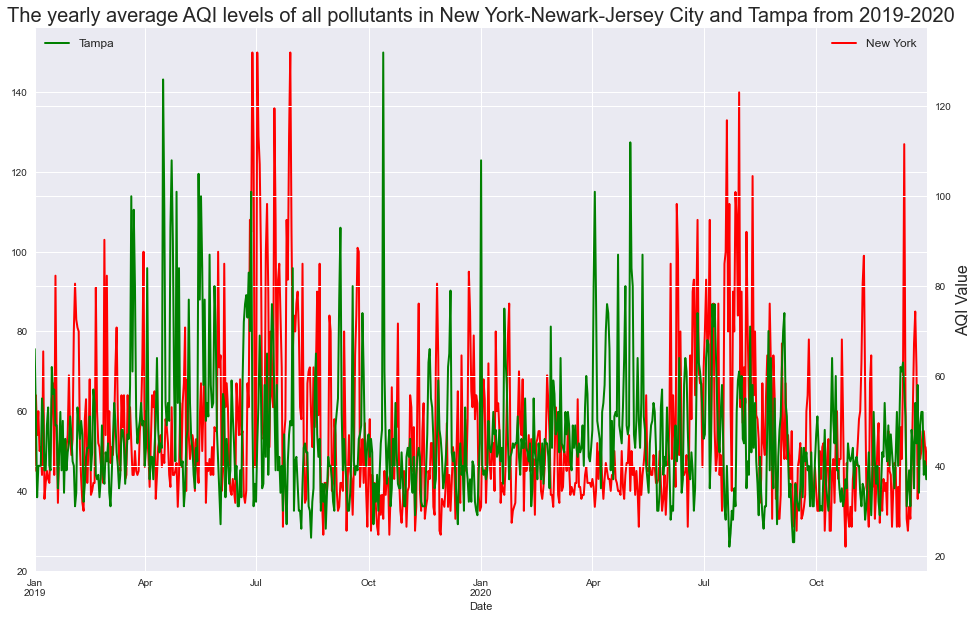

In [232]:
plt.style.use('seaborn')
plt.figure(figsize=(16,10))

# line plot - the yearly average AQI in New York and Tampa, FL
ax1 = aqi_df2['AQI Value NY'].plot(color='red', linewidth=2, grid=True, label='New York')
ax2 = aqi_df2['AQI Value TPA'].plot(color='green', linewidth=2, grid=True, label='Tampa', secondary_y=True)
ax1.legend(fontsize=12, loc=1)
ax2.legend(fontsize=12, loc=2)


# title and labels
plt.title('The yearly average AQI levels of all pollutants in New York-Newark-Jersey City and Tampa from 2019-2020', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('AQI Value', fontsize=16)
plt.show()

In [233]:
aqi_df = df_aqi_cle2.join(df_aqi_ny2, lsuffix='_left', rsuffix='_right')
aqi_df.head()

AQI Value CLE  AQI Value NY
Date                                   
2019-01-01           39.0          45.0
2019-01-02           55.0          64.0
2019-01-03           48.0          54.0
2019-01-04           66.0          60.0
2019-01-05           83.0          50.0

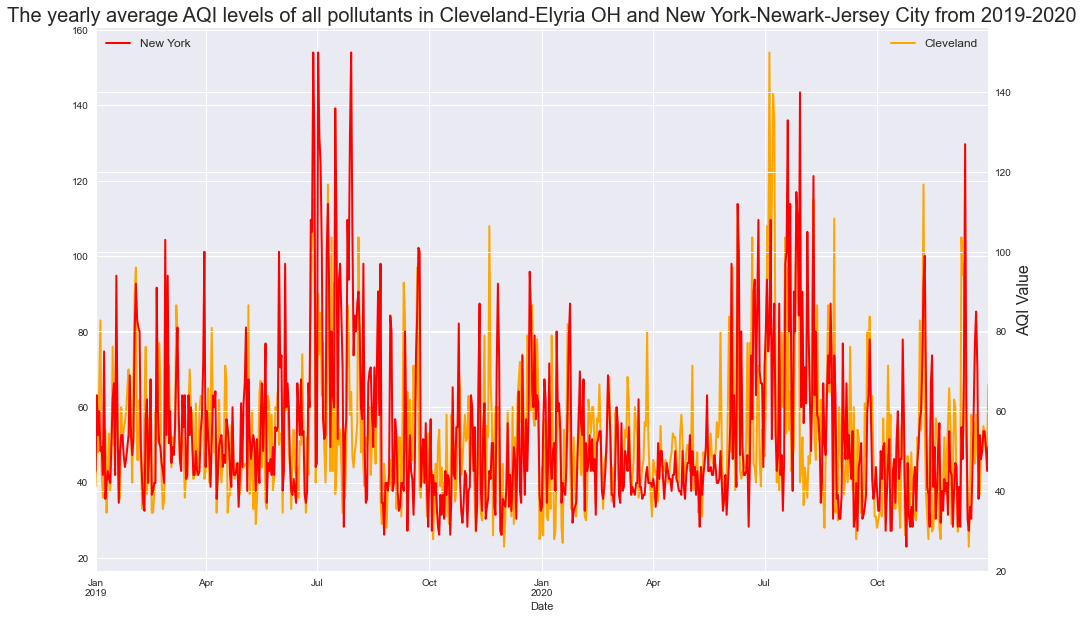

In [234]:
plt.style.use('seaborn')
plt.figure(figsize=(16,10))

# line plot - the yearly average AQI in Cleveland-Elyria and , OH
ax1 = aqi_df['AQI Value CLE'].plot(color='orange', linewidth=2, grid=True, label='Cleveland')
ax2 = aqi_df['AQI Value NY'].plot(color='red', linewidth=2, grid=True, label='New York', secondary_y=True)
ax1.legend(fontsize=12, loc=1)
ax2.legend(fontsize=12, loc=2)


# title and labels
plt.title('The yearly average AQI levels of all pollutants in Cleveland-Elyria OH and New York-Newark-Jersey City from 2019-2020', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('AQI Value', fontsize=16)
plt.show()

In [235]:
aqi_df3 = df_aqi_la2.join(df_aqi_ny2, lsuffix='_left', rsuffix='_right')
aqi_df3.head()

AQI Value LA  AQI Value NY
Date                                  
2019-01-01          67.0          45.0
2019-01-02          93.0          64.0
2019-01-03          67.0          54.0
2019-01-04          85.0          60.0
2019-01-05          83.0          50.0

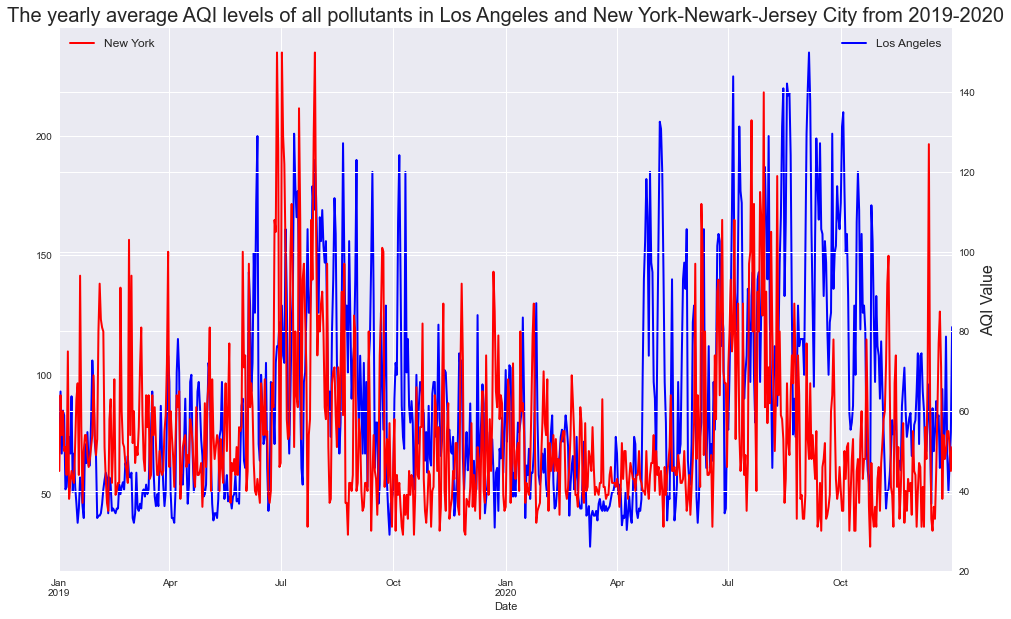

In [236]:
plt.style.use('seaborn')
plt.figure(figsize=(16,10))

# line plot - the yearly average AQI in New York and Tampa, FL
ax1 = aqi_df3['AQI Value LA'].plot(color='blue', linewidth=2, grid=True, label='Los Angeles')
ax2 = aqi_df3['AQI Value NY'].plot(color='red', linewidth=2, grid=True, label='New York', secondary_y=True)
ax1.legend(fontsize=12, loc=1)
ax2.legend(fontsize=12, loc=2)


# title and labels
plt.title('The yearly average AQI levels of all pollutants in Los Angeles and New York-Newark-Jersey City from 2019-2020', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('AQI Value', fontsize=16)
plt.show()

#### Moving Average over a period of 10 years

In [237]:
# the simple moving average over a period of 10 years for Cleveland
df_cle2['SMA_10'] = df_cle2['AQI_Value'].rolling(10, min_periods=1).mean()

# the simple moving average over a period of 20 year
df_cle2['SMA_20'] = df_cle2['AQI_Value'].rolling(20, min_periods=1).mean()

In [238]:
# SMV over a period of 10 years for LA
df_la2['SMA_10'] = df_la2['AQI_Value'].rolling(10, min_periods=1).mean()

# the simple moving average over a period of 20 year
df_la2['SMA_20'] = df_la2['AQI_Value'].rolling(20, min_periods=1).mean()

In [239]:
# SMV over a period of 10 years for New York
df_ny2['SMA_10'] = df_ny2['AQI_Value'].rolling(10, min_periods=1).mean()

# the simple moving average over a period of 20 year
df_ny2['SMA_20'] = df_ny2['AQI_Value'].rolling(20, min_periods=1).mean()

In [240]:
# SMV over a period of 10 years for Tampa
df_tampa2['SMA_10'] = df_tampa2['AQI_Value'].rolling(10, min_periods=1).mean()

# the simple moving average over a period of 20 year
df_tampa2['SMA_20'] = df_tampa2['AQI_Value'].rolling(20, min_periods=1).mean()

Text(0, 0.5, 'AQI Value')

<Figure size 1008x576 with 0 Axes>

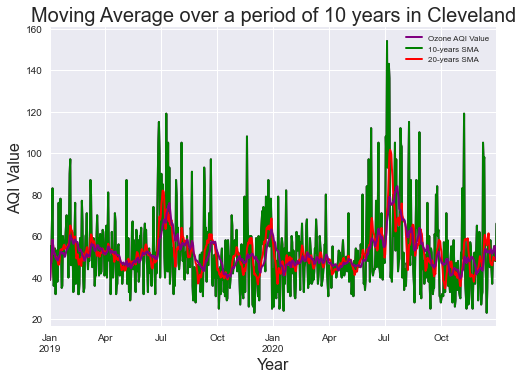

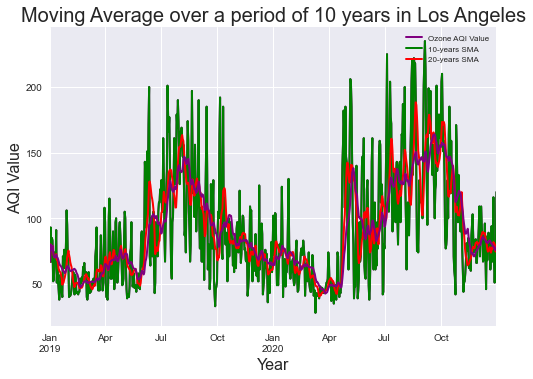

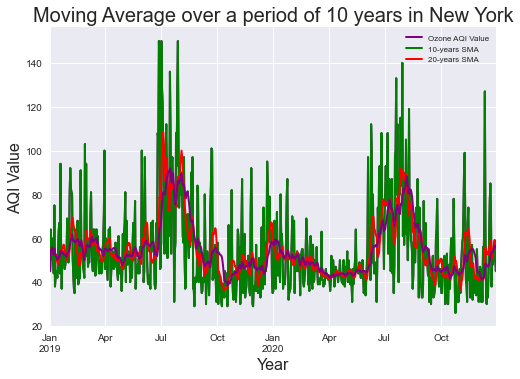

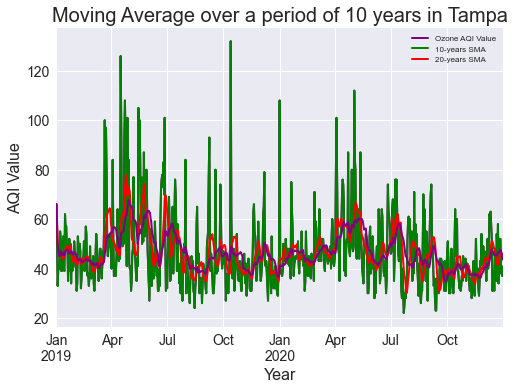

In [241]:
plt.figure(figsize=(14,8))

# colors for the line plot
colors = ['purple', 'green', 'red']

# line plot - the yearly average air temperature in Barcelona
ax1 = df_cle2.plot(color=colors, linewidth=2, grid=True, label='Cleveland')
ax2 = df_la2.plot(color=colors, linewidth=2, grid=True, label='Los Angeles')
ax3 = df_ny2.plot(color=colors, linewidth=2, grid=True, label='New York')
ax4 = df_tampa2.plot(color=colors, linewidth=2, grid=True, label='Tampa')
ax1.legend(labels =['Ozone AQI Value', '10-years SMA', '20-years SMA'], fontsize=8, loc=1)
ax2.legend(labels =['Ozone AQI Value', '10-years SMA', '20-years SMA'], fontsize=8, loc=1)
ax3.legend(labels =['Ozone AQI Value', '10-years SMA', '20-years SMA'], fontsize=8, loc=1)
ax4.legend(labels =['Ozone AQI Value', '10-years SMA', '20-years SMA'], fontsize=8, loc=1)

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# title and labels
ax1.set_title('Moving Average over a period of 10 years in Cleveland', fontsize=20)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('AQI Value', fontsize=16)
ax2.set_title('Moving Average over a period of 10 years in Los Angeles', fontsize=20)
ax2.set_xlabel('Year', fontsize=16)
ax2.set_ylabel('AQI Value', fontsize=16)
ax3.set_title('Moving Average over a period of 10 years in New York', fontsize=20)
ax3.set_xlabel('Year', fontsize=16)
ax3.set_ylabel('AQI Value', fontsize=16)
ax4.set_title('Moving Average over a period of 10 years in Tampa', fontsize=20)
ax4.set_xlabel('Year', fontsize=16)
ax4.set_ylabel('AQI Value', fontsize=16)

#### Cumulative moving average

In [242]:
# cumulative moving average for CLE
df_cle2['CMA'] = df_cle2.AQI_Value.expanding().mean()

In [243]:
# cumulative moving average for LA
df_la2['CMA'] = df_la2.AQI_Value.expanding().mean()

In [244]:
# cumulative moving average for NY
df_ny2['CMA'] = df_ny2.AQI_Value.expanding().mean()

In [245]:
# cumulative moving average for Tampa
df_tampa2['CMA'] = df_tampa2.AQI_Value.expanding().mean()

Text(0, 0.5, 'AQI Value')

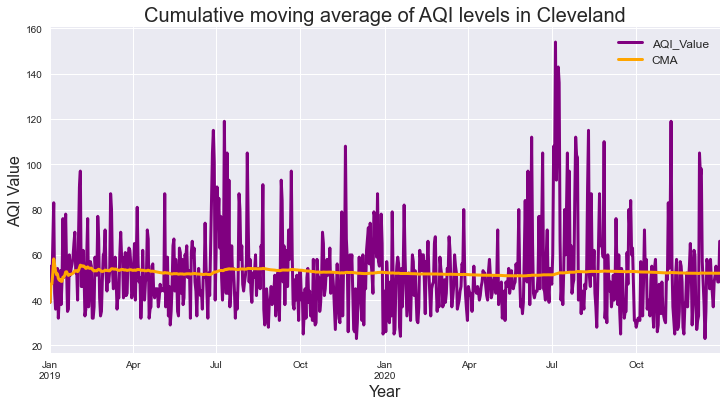

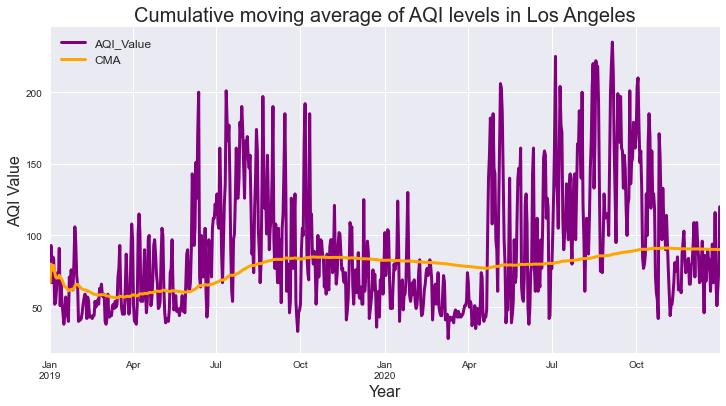

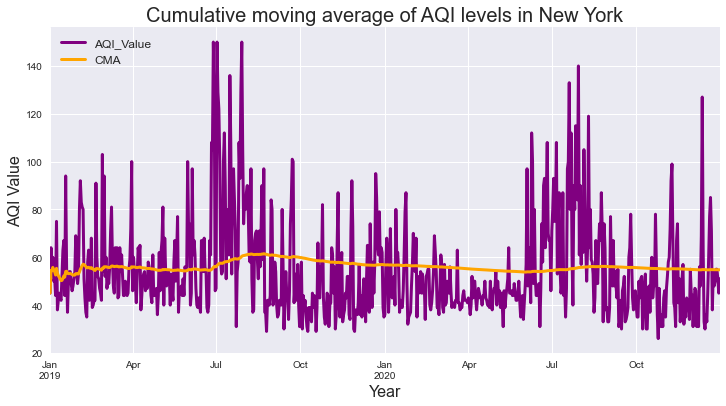

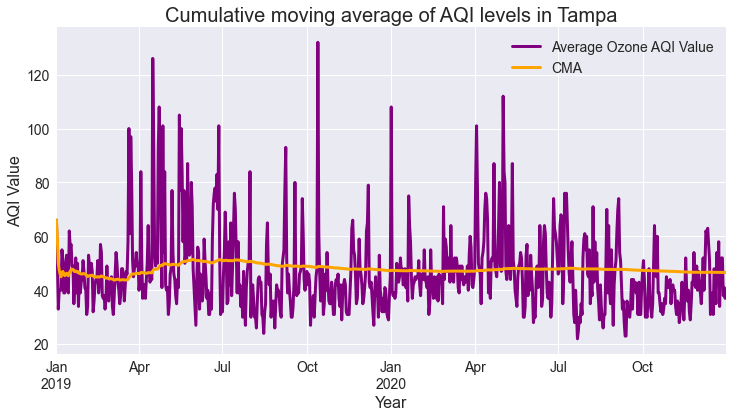

In [246]:
# colors for the line plot
colors = ['purple', 'orange']

# line plot - the yearly average air temperature in Barcelona
ax1 = df_cle2[['AQI_Value', 'CMA']].plot(color=colors, linewidth=3, figsize=(12,6))
ax2 = df_la2[['AQI_Value', 'CMA']].plot(color=colors, linewidth=3, figsize=(12,6))
ax3 = df_ny2[['AQI_Value', 'CMA']].plot(color=colors, linewidth=3, figsize=(12,6))
ax4 = df_tampa2[['AQI_Value', 'CMA']].plot(color=colors, linewidth=3, figsize=(12,6))
ax1.legend(fontsize=12, loc=1)
ax2.legend(fontsize=12, loc=2)
ax3.legend(fontsize=12, loc=2)
ax4.legend(fontsize=12, loc=2)

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Average Ozone AQI Value', 'CMA'], fontsize=14)

# title and labels
ax1.set_title('Cumulative moving average of AQI levels in Cleveland', fontsize=20)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('AQI Value', fontsize=16)
ax2.set_title('Cumulative moving average of AQI levels in Los Angeles', fontsize=20)
ax2.set_xlabel('Year', fontsize=16)
ax2.set_ylabel('AQI Value', fontsize=16)
ax3.set_title('Cumulative moving average of AQI levels in New York', fontsize=20)
ax3.set_xlabel('Year', fontsize=16)
ax3.set_ylabel('AQI Value', fontsize=16)
ax4.set_title('Cumulative moving average of AQI levels in Tampa', fontsize=20)
ax4.set_xlabel('Year', fontsize=16)
ax4.set_ylabel('AQI Value', fontsize=16)

## Analysis on Pollution using EnviroAtlas and Tableau

Here, we use [EnviroAtlas](https://enviroatlas.epa.gov/enviroatlas/interactivemap/) metadata to look at several metrics assessing pollution in the Cincinnati and Cleveland. This includes enviornmental impacts and an evaluation on pollutant reduction removed annually by tree cover, category being air. We will also use Tableau to visualize distributions and trends.

I. Cleveland, OH

In [247]:
ds_ppm = pd.read_csv(r'C:\Users\yuvem\OneDrive\Documents\GitHub\Tree-Canopy-Percentage-Air-Quality-Correlation-to-Acute-Resp-Illnesses-in-Ohio-cities-Project_\Percent particulate matter [PM2.5] removed annually by tree cover.csv')
ds_ppm.head()

OBJECTID  Shape  Block group id EnviroAtlas Community Code  \
0      1377    NaN    390351029001                      CleOH   
1      1378    NaN    390351029002                      CleOH   
2      1380    NaN    390351033001                      CleOH   
3      1386    NaN    390351036021                      CleOH   
4      1387    NaN    390351036022                      CleOH   

   Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr)  \
0                                          31.663301                             
1                                          50.024222                             
2                                          28.721144                             
3                                          21.873868                             
4                                          35.251860                             

   Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr)  \
0                                           0.506055                        
1                                           0.799511                        
2                                           0.387625                        
3                                           0.085754                        
4                                           0.138200                        

   Value of asthma exacerbation cases avoided due to nitrogen dioxide removed ($/yr)  \
0                                          42.571114                                   
1                                          67.257635                                   
2                                          32.151481                                   
3                                           7.183643                                   
4                                          11.577034                                   

   Acute respiratory symptoms avoided due to ozone removed (cases/yr)  \
0                                           0.429964                    
1                                           0.679313                    
2                                           0.488927                    
3                                           0.323015                    
4                                           0.520552                    

   Value of mortality avoided due to ozone removed ($/yr)  \
0                                        2467.581643        
1                                        3898.603387        
2                                        2476.856159        
3                                        1470.922223        
4                                        2370.447882        

   School days not lost to illness due to ozone removed (days/yr)  ...  \
0                                           0.235603               ...   
1                                           0.372235               ...   
2                                           0.168493               ...   
3                                           0.038107               ...   
4                                           0.061411               ...   

   Population in 0.2% Annual Chance Flood Hazard area - Percent  \
0                                           -99999.0              
1                                           -99999.0              
2                                           -99999.0              
3                                           -99999.0              
4                                           -99999.0              

   EnviroAtlas Community Name  State FIPS  County FIPS  Tract FIPS  ALAND10  \
0               Cleveland, OH          39           35      102900   273127   
1               Cleveland, OH          39           35      102900   241577   
2               Cleveland, OH          39           35      103300   503612   
3               Cleveland, OH          39           35      103602  1366152   
4               Cleveland, OH          39           35      103602   245455   

In [248]:
ds_ppm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Columns: 128 entries, OBJECTID to y
dtypes: float64(91), int64(35), object(2)
memory usage: 712.1+ KB


In [249]:
dfo = ds_ppm.select_dtypes(include=['object'])
dfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   EnviroAtlas Community Code  712 non-null    object
 1   EnviroAtlas Community Name  712 non-null    object
dtypes: object(2)
memory usage: 11.2+ KB


In [250]:
ds_ppm = ds_ppm.drop(columns='Block group id')
ds_ppm = ds_ppm.drop(columns='Shape')
ds_ppm = ds_ppm.drop(columns='EnviroAtlas Community Code')
ds_ppm = ds_ppm.drop(columns='Number of schools (K-12)')
ds_ppm = ds_ppm.drop(columns='Land area in 1% Annual Chance Flood Hazard area - Area (m2)')
ds_ppm = ds_ppm.drop(columns='Land area in 1% Annual Chance Flood Hazard area - Percent')
ds_ppm = ds_ppm.drop(columns='Land area in 0.2% Annual Chance Flood Hazard area - Area (m2)')
ds_ppm = ds_ppm.drop(columns='Land area in 0.2% Annual Chance Flood Hazard area - Percent')
ds_ppm = ds_ppm.drop(columns='Impervious surface in 1% Annual Chance Flood Hazard area - Area (m2)')
ds_ppm = ds_ppm.drop(columns='Impervious surface in 1% Annual Chance Flood Hazard area - Percent')
ds_ppm = ds_ppm.drop(columns='Impervious surface in 0.2% Annual Chance Flood Hazard area - Area (m2)')
ds_ppm = ds_ppm.drop(columns='Impervious surface in 0.2% Annual Chance Flood Hazard area - Percent')
ds_ppm = ds_ppm.drop(columns='Population in 1% Annual Chance Flood Hazard area - Total')
ds_ppm = ds_ppm.drop(columns='Population in 1% Annual Chance Flood Hazard area - Percent')
ds_ppm = ds_ppm.drop(columns='Population in 0.2% Annual Chance Flood Hazard area - Total')
ds_ppm = ds_ppm.drop(columns='Population in 0.2% Annual Chance Flood Hazard area - Percent')
ds_ppm = ds_ppm.drop(columns='State FIPS')
ds_ppm = ds_ppm.drop(columns='County FIPS')
ds_ppm = ds_ppm.drop(columns='Tract FIPS')
ds_ppm = ds_ppm.drop(columns='x')
ds_ppm = ds_ppm.drop(columns='y')
ds_ppm = ds_ppm.drop(['Population under 1 year old','Population under 13 years old','Population over 70 years old','Population other than White, non-Hispanic','Population with income below twice the US poverty level','Number of day care centers','K-12 schools with < 25 percent green space in viewshed','Reduction in mean load of total Kjeldahl nitrogen [TKN] (kg/yr)'],axis =1)

In [251]:
ds_ppm.head()

OBJECTID  \
0      1377   
1      1378   
2      1380   
3      1386   
4      1387   

   Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr)  \
0                                          31.663301                             
1                                          50.024222                             
2                                          28.721144                             
3                                          21.873868                             
4                                          35.251860                             

   Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr)  \
0                                           0.506055                        
1                                           0.799511                        
2                                           0.387625                        
3                                           0.085754                        
4                                           0.138200                        

   Value of asthma exacerbation cases avoided due to nitrogen dioxide removed ($/yr)  \
0                                          42.571114                                   
1                                          67.257635                                   
2                                          32.151481                                   
3                                           7.183643                                   
4                                          11.577034                                   

   Acute respiratory symptoms avoided due to ozone removed (cases/yr)  \
0                                           0.429964                    
1                                           0.679313                    
2                                           0.488927                    
3                                           0.323015                    
4                                           0.520552                    

   Value of mortality avoided due to ozone removed ($/yr)  \
0                                        2467.581643        
1                                        3898.603387        
2                                        2476.856159        
3                                        1470.922223        
4                                        2370.447882        

   School days not lost to illness due to ozone removed (days/yr)  \
0                                           0.235603                
1                                           0.372235                
2                                           0.168493                
3                                           0.038107                
4                                           0.061411                

   Value of school days not lost to illness due to ozone removed ($/yr)  \
0                                          23.133884                      
1                                          36.549847                      
2                                          16.544393                      
3                                           3.741710                      
4                                           6.029966                      

   Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)  \
0                                           0.241419                                         
1                                           0.381420                                         
2                                           0.274113                                         
3                                           0.180734                                         
4                                           0.291257                                         

   Value of mortality avoided due to particulate matter [PM2.5] removed ($/yr)  \
0                                        6914.820192                             
1                         

In [252]:
ds_ppm.shape

(712, 99)

In [253]:
np.sum(ds_ppm.isna())

OBJECTID                                                                             0
Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr)          0
Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr)               0
Value of asthma exacerbation cases avoided due to nitrogen dioxide removed ($/yr)    0
Acute respiratory symptoms avoided due to ozone removed (cases/yr)                   0
                                                                                    ..
bgrp                                                                                 0
EnviroAtlas Community Name                                                           0
ALAND10                                                                              0
AWATER10                                                                             0
ORIG_FID                                                                             0
Length: 99, dtype: int64

In [254]:
ds_ppm.columns

Index(['OBJECTID',
       'Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr)',
       'Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr)',
       'Value of asthma exacerbation cases avoided due to nitrogen dioxide removed ($/yr)',
       'Acute respiratory symptoms avoided due to ozone removed (cases/yr)',
       'Value of mortality avoided due to ozone removed ($/yr)',
       'School days not lost to illness due to ozone removed (days/yr)',
       'Value of school days not lost to illness due to ozone removed ($/yr)',
       'Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)',
       'Value of mortality avoided due to particulate matter [PM2.5] removed ($/yr)',
       'Asthma exacerbation avoided due to sulfur dioxide removed (cases/yr)',
       'Value of asthma exacerbation cases avoided due to sulfur dioxide removed ($/yr)',
       'Value of hospital admissions avoided due to sulfur dioxide removed 

In [255]:
cols = ["Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)", "Value of mortality avoided due to particulate matter [PM2.5] removed ($/yr)", "Average reduction in nighttime ambient temperature (Celsius)", "Average reduction in daytime ambient temperature (Celsius)", "Particulate matter [PM2.5] (kg/yr)", "Percent tree cover in 15m buffer", "Percent vegetated cover in 15m buffer", "Percent particulate matter [PM2.5] removed annually by tree cover"]
ds_ppm_analysis = ds_ppm[cols]

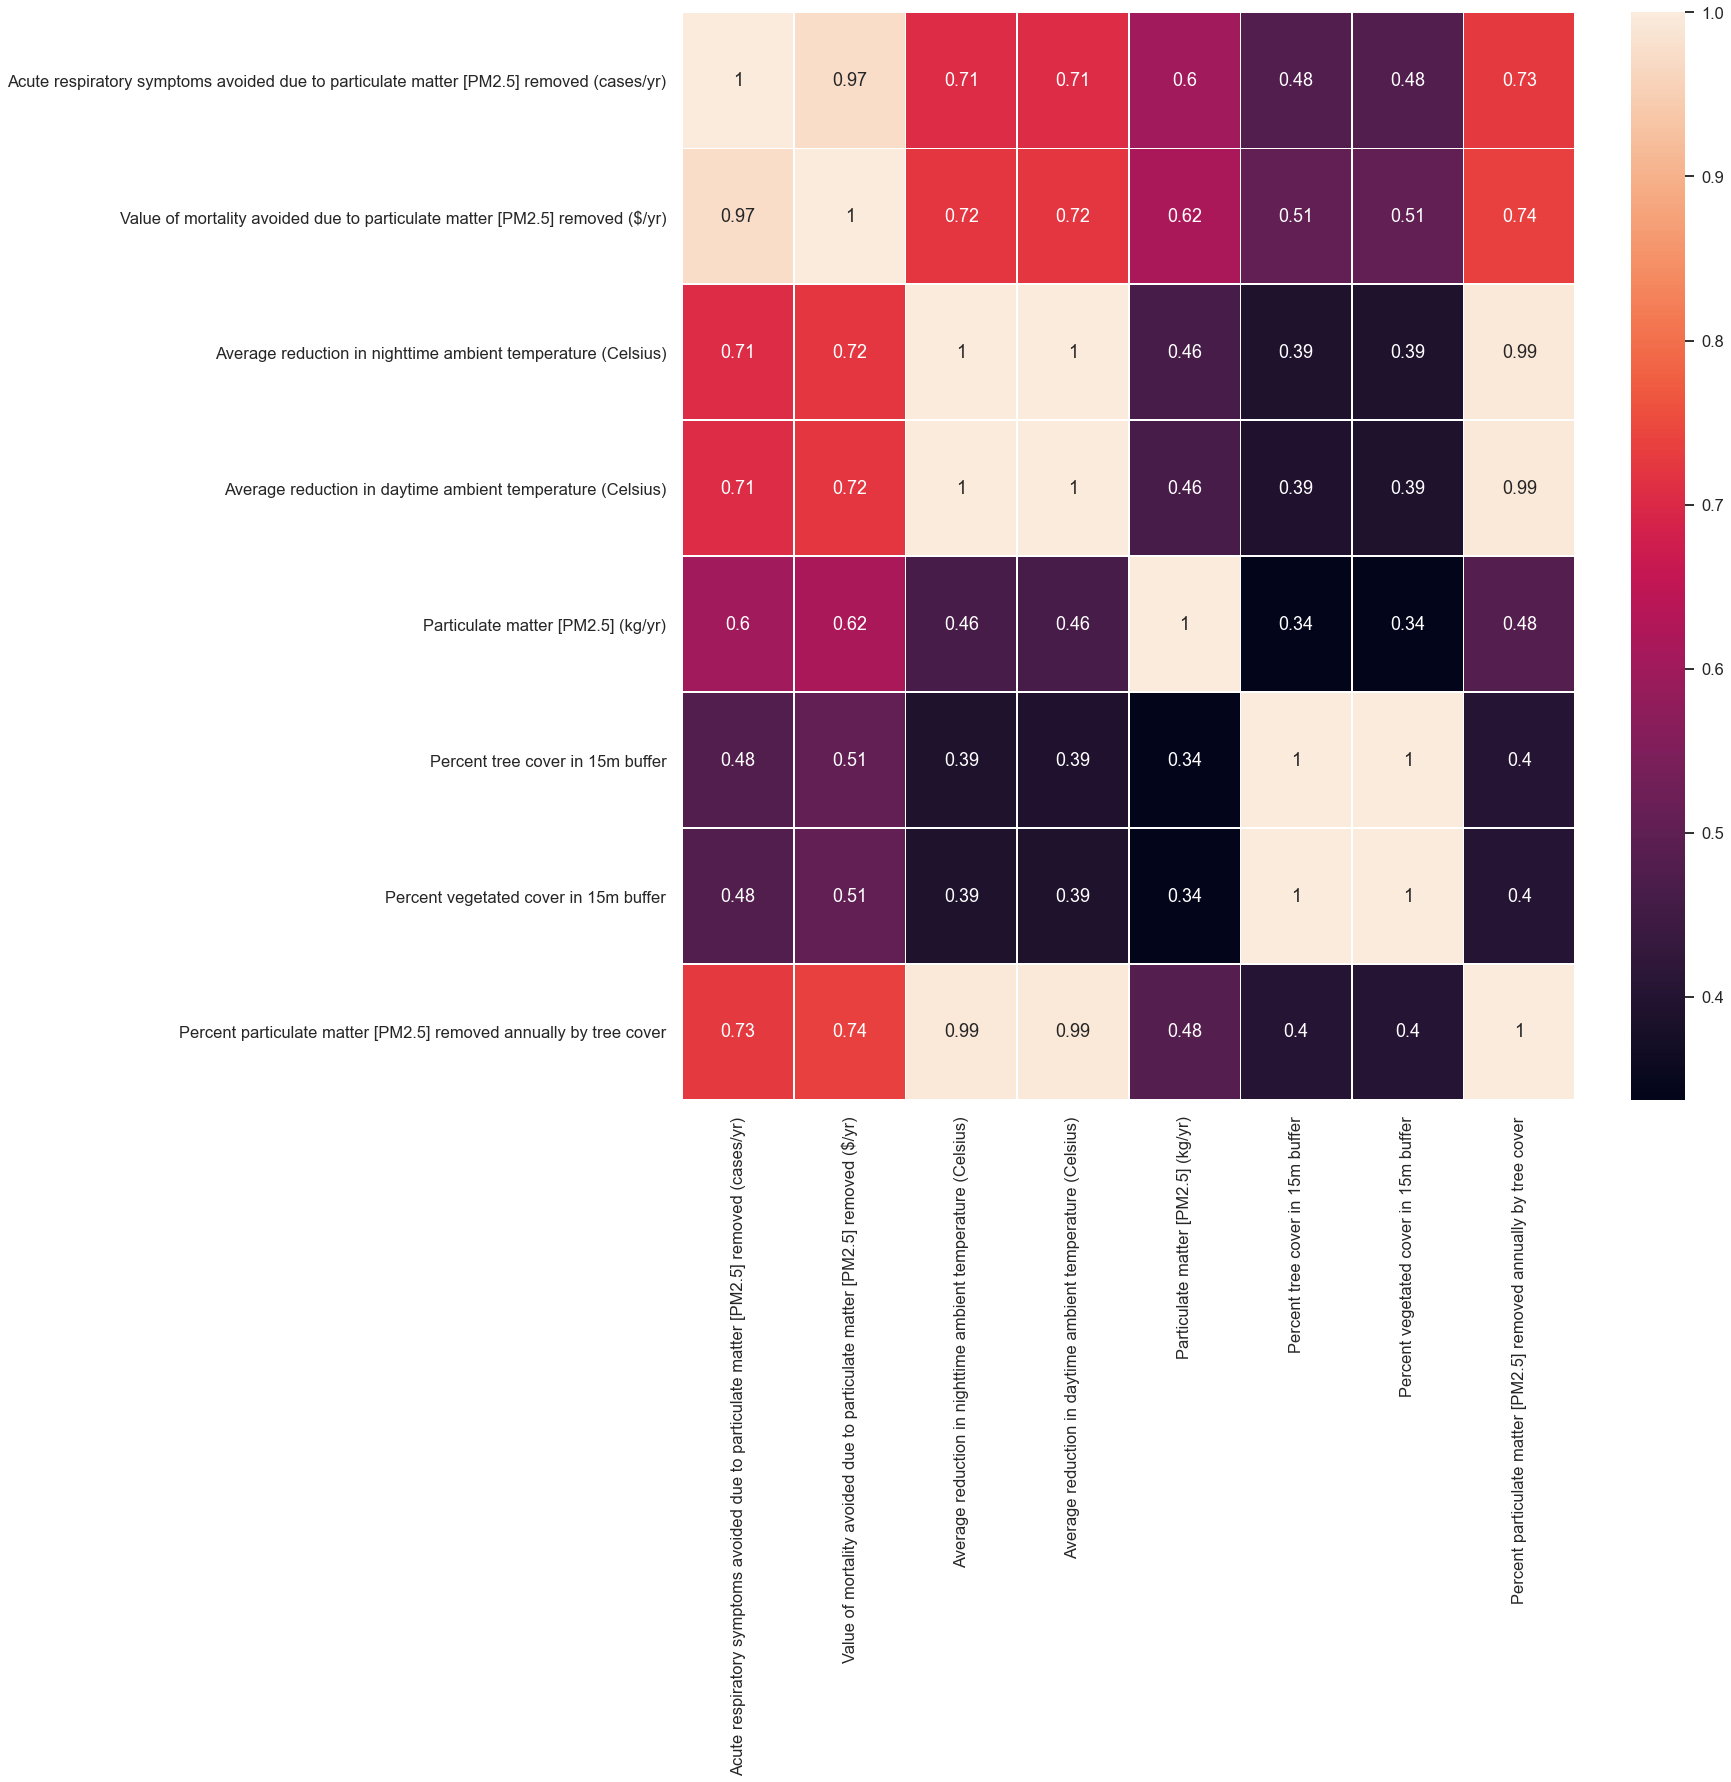

In [256]:
# Make heatmap of data
sns.set_context("talk")
_= plt.figure(figsize=(20,20))
heatmap = sns.heatmap(ds_ppm_analysis.corr(), annot=True, linewidth=0.6)
plt.show()

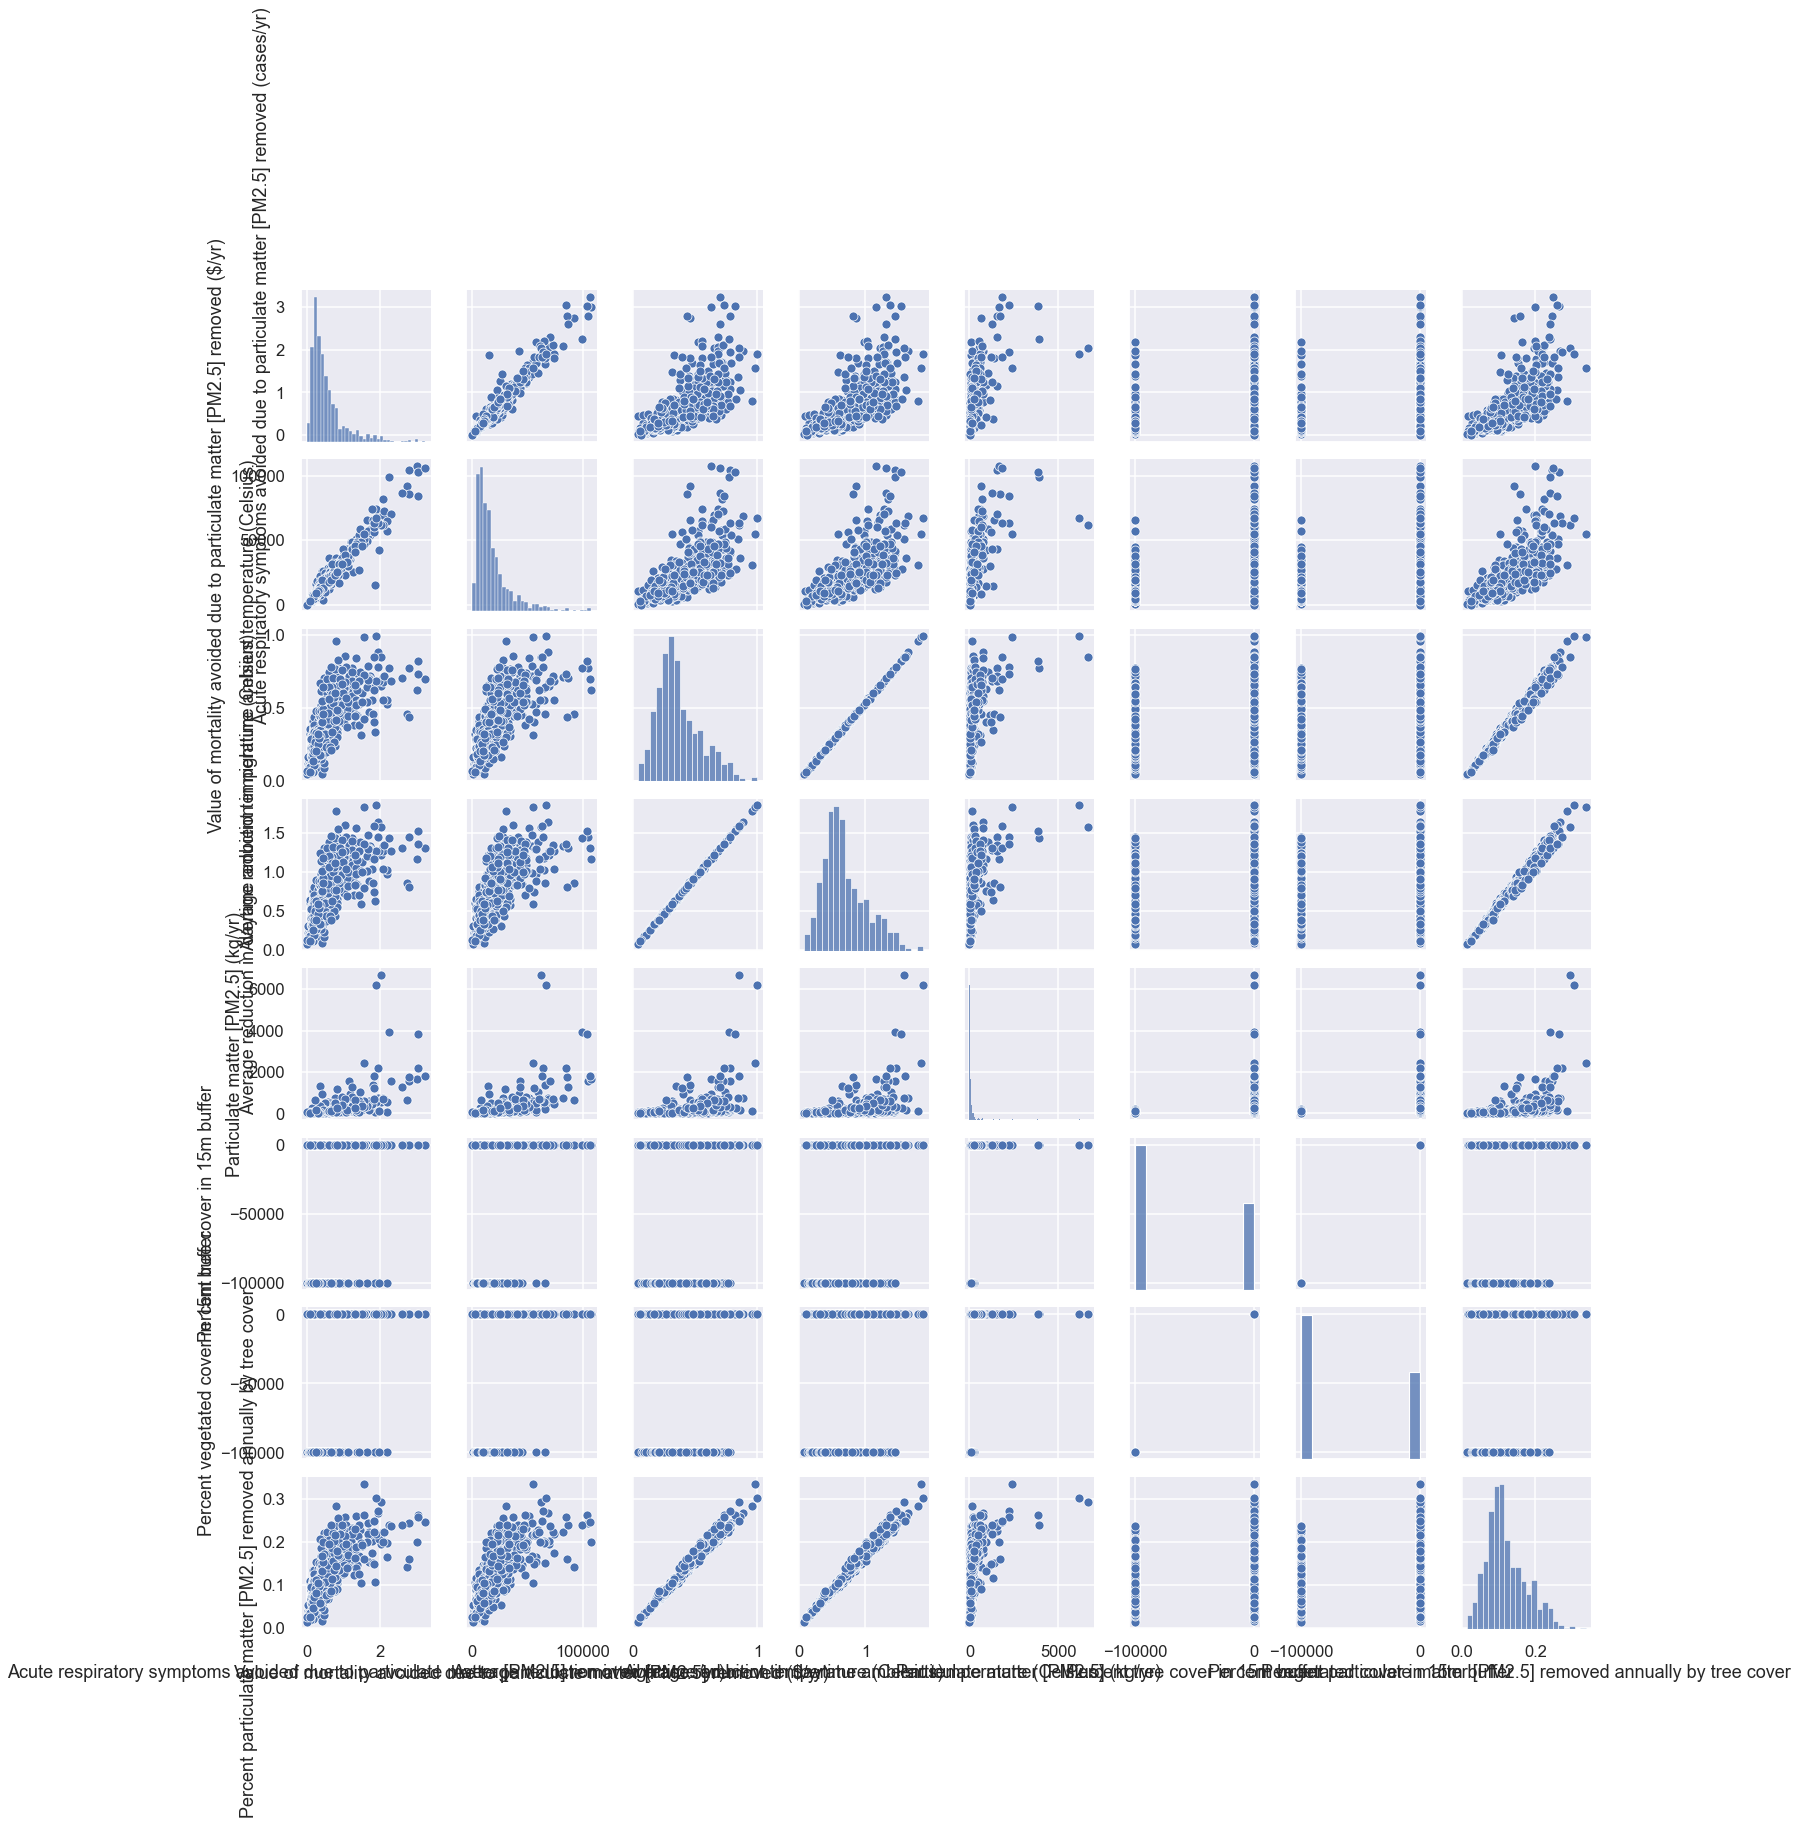

In [257]:
sns.pairplot(ds_ppm_analysis)

In [258]:
duplicateRowsDF = ds_ppm_analysis[ds_ppm_analysis.duplicated()]
duplicateRowsDF

Empty DataFrame
Columns: [Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr), Value of mortality avoided due to particulate matter [PM2.5] removed ($/yr), Average reduction in nighttime ambient temperature (Celsius), Average reduction in daytime ambient temperature (Celsius), Particulate matter [PM2.5] (kg/yr), Percent tree cover in 15m buffer, Percent vegetated cover in 15m buffer, Percent particulate matter [PM2.5] removed annually by tree cover]
Index: []

In [259]:
ds_ppm_analysis['Particulate matter [PM2.5] (kg/yr)'] = ds_ppm_analysis['Particulate matter [PM2.5] (kg/yr)'].astype(int)

In [260]:
ds_ppm_analysis['Particulate matter [PM2.5] (kg/yr)'].dtype

dtype('int32')

In [261]:
ds_ppm_analysis.head()

Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)  \
0                                           0.241419                                         
1                                           0.381420                                         
2                                           0.274113                                         
3                                           0.180734                                         
4                                           0.291257                                         

   Value of mortality avoided due to particulate matter [PM2.5] removed ($/yr)  \
0                                        6914.820192                             
1                                       10924.783630                             
2                                        7351.426344                             
3                                        5809.611139                             
4                                        9362.305347                             

   Average reduction in nighttime ambient temperature (Celsius)  \
0                                           0.208037              
1                                           0.259908              
2                                           0.085852              
3                                           0.121610              
4                                           0.281127              

   Average reduction in daytime ambient temperature (Celsius)  \
0                                           0.386946            
1                                           0.486685            
2                                           0.157602            
3                                           0.227687            
4                                           0.530008            

   Particulate matter [PM2.5] (kg/yr)  Percent tree cover in 15m buffer  \
0                                  15                         -99999.00   
1                                  18                         -99999.00   
2                                  11                              2.99   
3                                  49                              5.80   
4                                  18                         -99999.00   

   Percent vegetated cover in 15m buffer  \
0                              -99999.00   
1                              -99999.00   
2                                  11.30   
3                                  27.42   
4                              -99999.00   

   Percent particulate matter [PM2.5] removed annually by tree cover  
0                                           0.064822                  
1                                           0.089630                  
2                                           0.027520                  
3                                           0.043109                  
4                                           0.088673

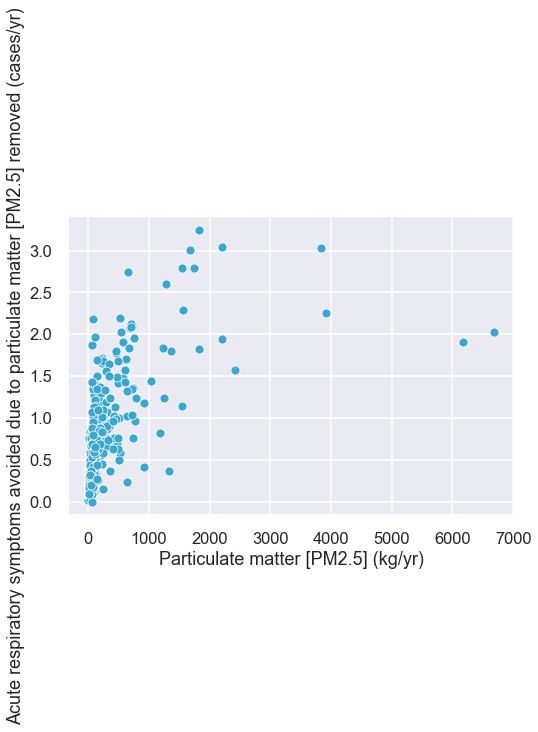

In [262]:
sns.set_style("darkgrid")
custom_palette = ["#39A7D0","#36ADA4"]
sns.set_palette(custom_palette)

sns.scatterplot(x='Particulate matter [PM2.5] (kg/yr)', y='Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)', data=ds_ppm_analysis)
plt.show()

<AxesSubplot:xlabel='Particulate matter [PM2.5] (kg/yr)', ylabel='Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)'>

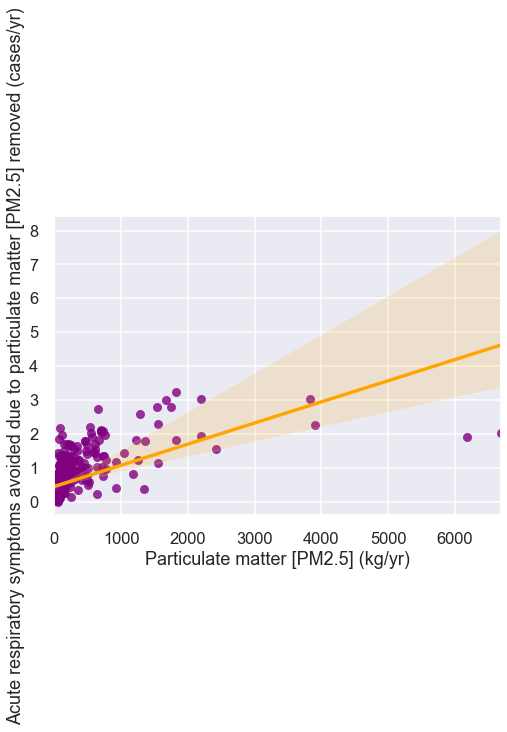

In [263]:
sns.regplot(x="Particulate matter [PM2.5] (kg/yr)", y="Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)", data=ds_ppm_analysis, scatter_kws={"color": "purple"}, line_kws={"color": "orange"})

In [264]:
ds_ppm_analysis.describe()

Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)  \
count                                         712.000000                                         
mean                                            0.555217                                         
std                                             0.494855                                         
min                                             0.000155                                         
25%                                             0.240700                                         
50%                                             0.404176                                         
75%                                             0.675749                                         
max                                             3.244864                                         

       Value of mortality avoided due to particulate matter [PM2.5] removed ($/yr)  \
count                                         712.000000                             
mean                                        18621.026876                             
std                                         16853.976420                             
min                                             4.687211                             
25%                                          7589.191775                             
50%                                         13446.126545                             
75%                                         22962.377615                             
max                                        107453.585700                             

       Average reduction in nighttime ambient temperature (Celsius)  \
count                                         712.000000              
mean                                            0.369258              
std                                             0.175169              
min                                             0.044096              
25%                                             0.246773              
50%                                             0.330812              
75%                                             0.465037              
max                                             0.995412              

       Average reduction in daytime ambient temperature (Celsius)  \
count                                         712.000000            
mean                                            0.687808            
std                                             0.327112            
min                                             0.076473            
25%                                             0.458284            
50%                                             0.615510            
75%                                             0.872741            
max                                             1.856964            

       Particulate matter [PM2.5] (kg/yr)  Percent tree cover in 15m buffer  \
count                          712.000000                        712.000000   
mean                           158.334270                     -62478.883806   
std                            477.889739                      48472.315933   
min                              0.000000                     -99999.000000   
25%                             19.000000                     -99999.000000   
50%                             38.500000                     -99999.000000   
75%                            100.250000                         44.160001   
max                           6685.000000                        100.000000   

       Percent vegetated cover in 15m buffer  \
count                             712.000000   
mean                           -62469.207935   
std                             48484.815157   
min                            -99999.000000   
25%                            -99999.000000   
50%                            -99999.000000   
75%                                79.2

## Split Train and Test Set

In [289]:
from sklearn.model_selection import train_test_split
# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
x_train, x_test, y_train, y_test = train_test_split(ds_ppm_analysis["Particulate matter [PM2.5] (kg/yr)"], ds_ppm_analysis["Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)"], train_size = 0.75, test_size = 0.25, shuffle = True)

In [266]:
# We now want to check the shape of the X train, y_train, X_test and y_test to make sure the proportions are right. 
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(534,) (534,) (178,) (178,)


### Making a Linear Regression model: Model 1

In [267]:
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings 

rModel = linear_model.LinearRegression(normalize=True)
x_train_ = np.array(x_train).reshape(-1,1)
y_train_ = np.array(y_train).reshape(-1,1)
print(x_train_.shape, y_train_.shape)

(534, 1) (534, 1)


In [268]:
rModel.fit(x_train_, y_train_)

LinearRegression(normalize=True)

In [269]:
# Evaluate the model  
rModel.score(x_train_, y_train_)

0.3245171854770529

The above number is our R-squred coefficient. Model 1 explains only about 36% of the variation from the mean. Let's keep going.

In [270]:
x_test_ = np.array(x_test).reshape(-1,1)

In [271]:
# Use the model to make predictions about our test data
y_predict = rModel.predict(x_test_)

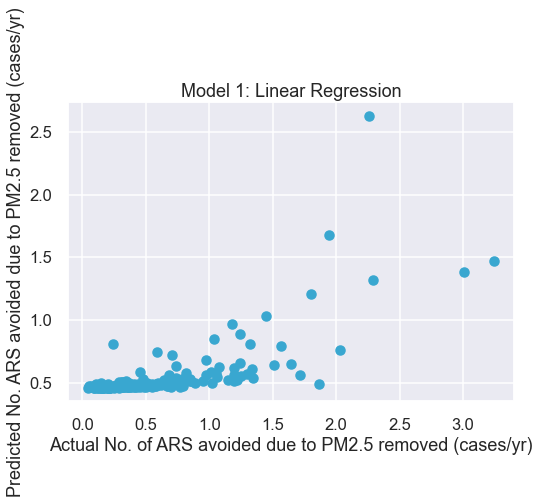

In [272]:
# Let's plot the predictions against the actual result. Use scatter()
_ = plt.scatter(y_test, y_predict)
_ = plt.xlabel("Actual No. of ARS avoided due to PM2.5 removed (cases/yr)")
_ = plt.ylabel("Predicted No. ARS avoided due to PM2.5 removed (cases/yr)")
_ = plt.title("Model 1: Linear Regression")
plt.show()

## Multiple Linear Regression - Model 2

In [273]:
# Create test and train datasets
# This is again very similar, but now we include more columns in the predictors
# Include all columns from data in the explanatory variables X except fixed.acidity and quality (which was an integer)
x2 = ds_ppm_analysis.drop(["Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)"], axis=1)

# Create constants for X, so the model knows its bounds
x2 = sm.add_constant(x2)

# Split the data
y = ds_ppm_analysis[["Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)"]]
x2_train, x2_test, y_train, y_test = train_test_split(x2, y, test_size=0.25, shuffle=True)

In [274]:
# We can use almost identical code to create the third model, because it is the same algorithm, just different inputs
# Create the model
rModel_2 = sm.OLS(y_train, x2_train)

# Fit the model
fit_model2 = rModel_2.fit()

In [275]:
# Evaluate the model
fit_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                               OLS Regression Results                                                              
===================================================================================================================================================
Dep. Variable:     Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)   R-squared:                       0.947
Model:                                                                                                 OLS   Adj. R-squared:                  0.947
Method:                                                                                      Least Squares   F-statistic:                     1355.
Date:                                                                                     Fri, 13 Aug 2021   Prob (F-statistic):               0.00
Time:                                                                                             20:13:34   Log-Likelihood:                 399.16
No. Observations:                                                                                      534   AIC:                            -782.3
Df Residuals:                                                                                          526   BIC:                            -748.1
Df Model:                                                                                                7                                         
Covariance Type:                                                                                 nonrobust                                         
===============================================================================================================================================
                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------
const                                                                           0.0071      0.025      0.288      0.774      -0.042       0.056
Value of mortality avoided due to particulate matter [PM2.5] removed ($/yr)  2.851e-05   5.03e-07     56.705      0.000    2.75e-05    2.95e-05
Average reduction in nighttime ambient temperature (Celsius)                    0.0970      1.405      0.069      0.945      -2.663       2.857
Average reduction in daytime ambient temperature (Celsius)                     -0.7888      0.773     -1.021      0.308      -2.307       0.729
Particulate matter [PM2.5] (kg/yr)                                          -3.732e-06    1.2e-05     -0.311      0.756   -2.73e-05    1.99e-05
Percent tree cover in 15m buffer                                                0.0012      0.001      2.185      0.029       0.000       0.002
Percent vegetated cover in 15m buffer                                          -0.0012      0.001     -2.186      0.029      -0.002      -0.000
Percent particulate matter [PM2.5] removed annually by tree cover               4.4619      0.845      5.278      0.000       2.801       6.123
==============================================================================
Omnibus:                      555.983   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56657.627
Skew:                           4.385   Prob(JB):                         0.00
Kurtosis:                      52.694   Cond. No.                     3.61e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.61e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Wow, Model 2 is predicting around 97% of the variation!

In [276]:
# Use our new model to make predictions
y2_predict = fit_model2.predict(x2_test)

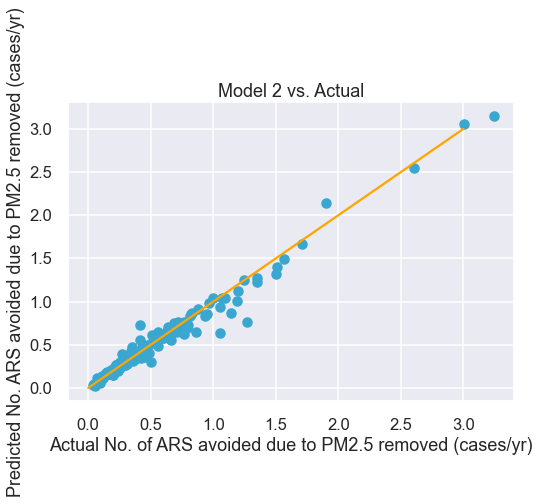

In [277]:
# Plot the predictions
# Build a scatterplot
_ = plt.scatter(y_test, y2_predict)
_ = plt.title("Model 2 vs. Actual")
_ = plt.xlabel("Actual No. of ARS avoided due to PM2.5 removed (cases/yr)")
_ = plt.ylabel("Predicted No. ARS avoided due to PM2.5 removed (cases/yr)")
# Add a line for perfect correlation
_ = plt.plot([x for x in range(0,4)], [x for x in range(0,4)], color = "orange")
plt.show()

Next, we'll try RMSE, since it is recommended that RMSE be used as the primary metric to interpret the model.

In [278]:
# Define a function to check the RMSE
def RMSE(predictions, actual):
    return np.sqrt(np.mean((predictions-actual) **2))

In [279]:
# Get predictions from rModel3
y2_predict = fit_model2.predict(x2_test)
# Put the predictions & actual values into a dataframe
df = pd.DataFrame(y_test)
df.rename(columns = {"Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)":"actual"}, inplace=True)
df["predicted"] = y2_predict

RMSE(df["predicted"], df["actual"])

0.08146122196065265

The RMSE tells us how far, on average, our predictions were mistaken. An RMSE of 0 would mean we were making perfect predictions. 0.14 signifies that we are, on average, about 0.09 of a unit of No. of Acute respiratory symptoms avoided due to PM2.5 removed (cases/yr) away from the correct answer.

### Model building, again

In [294]:
x_train, x_test, y_train, y_test = train_test_split(ds_ppm_analysis["Particulate matter [PM2.5] (kg/yr)"], ds_ppm_analysis["Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)"], train_size = 0.75, test_size = 0.25, shuffle = True)

In [295]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(534,) (534,) (178,) (178,)


In [296]:
x3 = ds_ppm_analysis.drop(["Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)"], axis=1)

# Create constants for X, so the model knows its bounds
x3 = sm.add_constant(x2)

# Split the data
y = ds_ppm_analysis[["Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)"]]
x3_train, x3_test, y_train, y_test = train_test_split(x3, y, test_size=0.25, shuffle=True)

In [297]:
rModel_3 = sm.OLS(y_train, x3_train)

# Fit the model
fit_model3 = rModel_3.fit()

In [298]:
fit_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                               OLS Regression Results                                                              
===================================================================================================================================================
Dep. Variable:     Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)   R-squared:                       0.950
Model:                                                                                                 OLS   Adj. R-squared:                  0.949
Method:                                                                                      Least Squares   F-statistic:                     1431.
Date:                                                                                     Fri, 13 Aug 2021   Prob (F-statistic):               0.00
Time:                                                                                             20:22:37   Log-Likelihood:                 410.89
No. Observations:                                                                                      534   AIC:                            -805.8
Df Residuals:                                                                                          526   BIC:                            -771.5
Df Model:                                                                                                7                                         
Covariance Type:                                                                                 nonrobust                                         
===============================================================================================================================================
                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------
const                                                                          -0.0041      0.024     -0.170      0.865      -0.052       0.044
Value of mortality avoided due to particulate matter [PM2.5] removed ($/yr)  2.878e-05   4.96e-07     58.050      0.000    2.78e-05    2.98e-05
Average reduction in nighttime ambient temperature (Celsius)                   -0.3388      1.303     -0.260      0.795      -2.899       2.222
Average reduction in daytime ambient temperature (Celsius)                     -0.5623      0.710     -0.792      0.429      -1.957       0.832
Particulate matter [PM2.5] (kg/yr)                                          -1.491e-05    1.2e-05     -1.239      0.216   -3.85e-05    8.72e-06
Percent tree cover in 15m buffer                                                0.0013      0.001      2.345      0.019       0.000       0.002
Percent vegetated cover in 15m buffer                                          -0.0013      0.001     -2.346      0.019      -0.002      -0.000
Percent particulate matter [PM2.5] removed annually by tree cover               4.6045      0.864      5.327      0.000       2.907       6.303
==============================================================================
Omnibus:                      588.194   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            66153.988
Skew:                           4.812   Prob(JB):                         0.00
Kurtosis:                      56.671   Cond. No.                     3.36e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.36e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Residual Plot and Heteroscedasticity

In [299]:
# Use our new model to make predictions
y3_predict = fit_model3.predict(x3_test)

In [300]:
residual=y_train-y3_predict

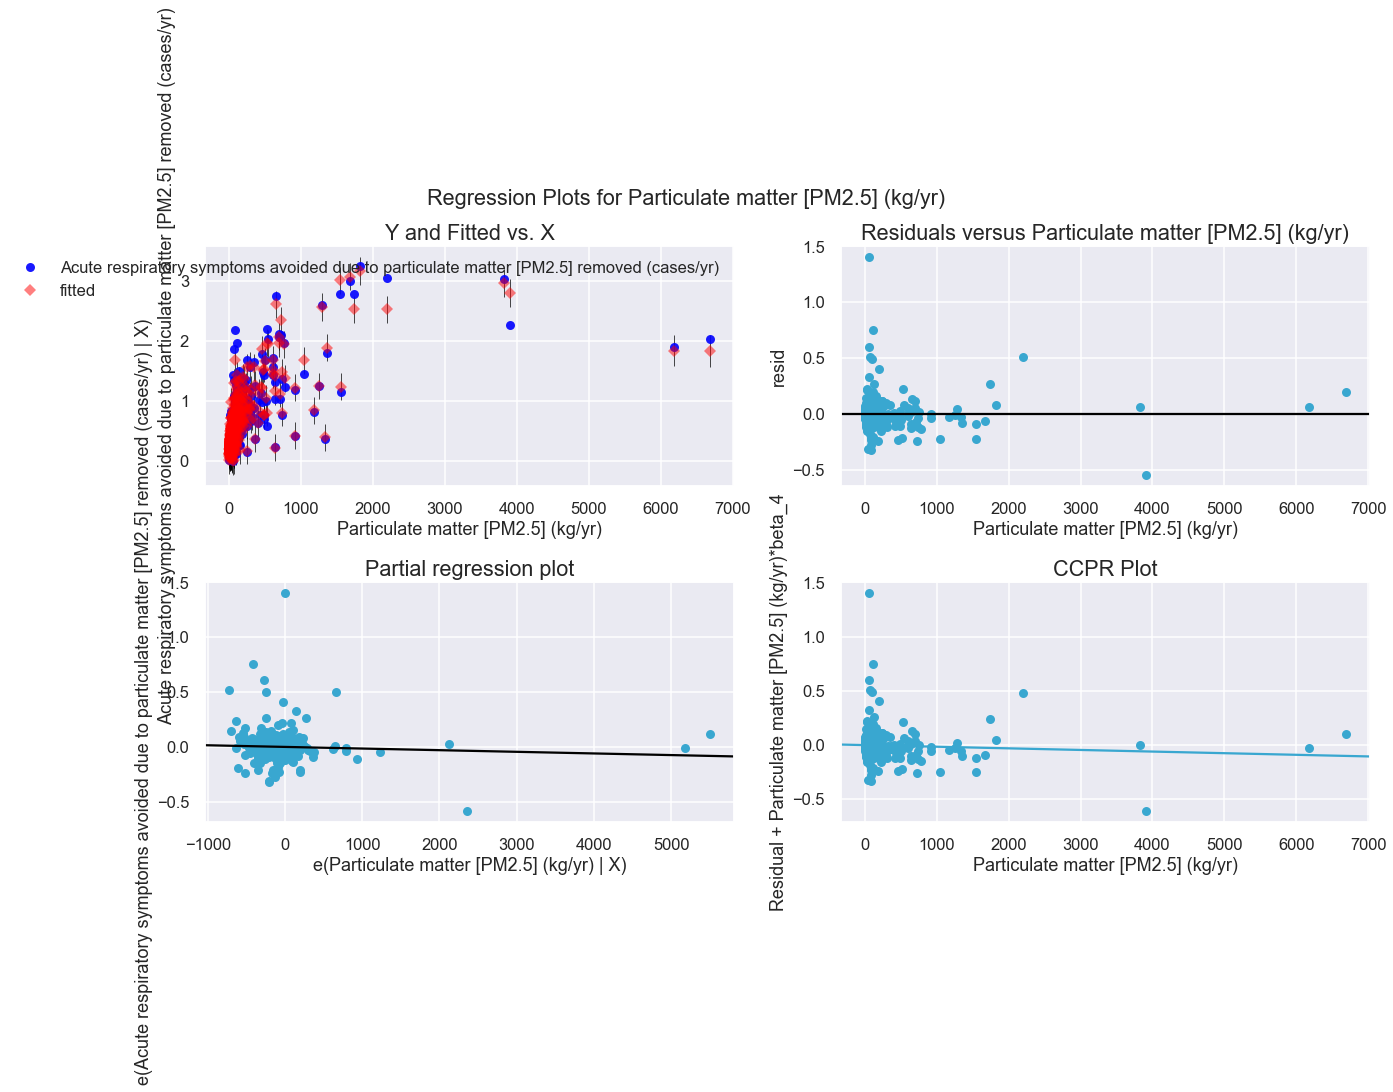

In [309]:
from statsmodels.formula.api import ols

#define figure size
fig = plt.figure(figsize=(20,10))

#produce regression plots
fig = sm.graphics.plot_regress_exog(fit_model3, "Particulate matter [PM2.5] (kg/yr)", fig=fig)

## Analysis on Tree Canopy/Green Space

Using the same dataset, we will make an analysis on green space and tree canopy percentage. We'll have to do some cleaning on the data first.

Before we continue, let's define some key terms. **Tree Cover per capita**, the metric we will look at, provides a baseline for the percent of tree cover per capita in any given block group in the greater community.
Tree coverage takes many forms, including street trees, parks, urban forests, and single trees. on various properties. **Green space** is the square meters of total land per person within each census block group that is covered by vegetation, or green space. Green space may include trees, lawns and gardens, crop land, and wetlands.

In [310]:
ds_ppm.columns

Index(['OBJECTID',
       'Value of hospital admissions avoided due to nitrogen dioxide removed ($/yr)',
       'Asthma exacerbation avoided due to nitrogen dioxide removed (cases/yr)',
       'Value of asthma exacerbation cases avoided due to nitrogen dioxide removed ($/yr)',
       'Acute respiratory symptoms avoided due to ozone removed (cases/yr)',
       'Value of mortality avoided due to ozone removed ($/yr)',
       'School days not lost to illness due to ozone removed (days/yr)',
       'Value of school days not lost to illness due to ozone removed ($/yr)',
       'Acute respiratory symptoms avoided due to particulate matter [PM2.5] removed (cases/yr)',
       'Value of mortality avoided due to particulate matter [PM2.5] removed ($/yr)',
       'Asthma exacerbation avoided due to sulfur dioxide removed (cases/yr)',
       'Value of asthma exacerbation cases avoided due to sulfur dioxide removed ($/yr)',
       'Value of hospital admissions avoided due to sulfur dioxide removed 

In [311]:
ds_ppm['Green space per capita (m2/person)'].unique()

array([8.836000e+01, 1.034400e+02, 4.268000e+01, 5.146300e+02,
       1.195800e+02, 1.769000e+02, 2.347600e+02, 2.374300e+02,
       2.010100e+02, 2.167500e+02, 2.627700e+02, 3.473200e+02,
       1.043800e+02, 7.343400e+02, 1.955300e+02, 9.151000e+01,
       1.660300e+02, 4.179500e+02, 2.968000e+02, 1.179300e+02,
       9.596000e+01, 7.895000e+02, 1.114500e+02, 1.734100e+02,
       8.016000e+01, 1.273800e+02, 1.063000e+02, 1.603400e+02,
       3.372500e+02, 1.230000e+02, 1.147500e+02, 1.016900e+02,
       1.100400e+02, 1.213200e+02, 9.417000e+01, 6.054600e+02,
       5.936200e+02, 8.957000e+01, 2.322400e+02, 3.228200e+02,
       1.112000e+02, 3.420100e+02, 2.779000e+02, 2.502800e+02,
       4.075900e+02, 9.910000e+01, 1.057400e+02, 1.223200e+02,
       1.639800e+02, 8.328000e+01, 7.820000e+01, 2.256500e+02,
       2.569700e+02, 2.097900e+02, 1.847600e+02, 1.029330e+03,
       4.050700e+02, 2.024500e+02, 7.937000e+01, 1.508400e+02,
       6.383000e+01, 3.931000e+02, 3.189800e+02, 1.4366

In [312]:
ds_ppm['Tree cover per capita (m2/person)'].unique()

array([4.364000e+01, 4.804000e+01, 1.408000e+01, 1.587900e+02,
       7.923000e+01, 9.844000e+01, 1.062900e+02, 1.097600e+02,
       9.411000e+01, 9.329000e+01, 1.306800e+02, 1.668200e+02,
       4.471000e+01, 1.763700e+02, 8.722000e+01, 3.858000e+01,
       8.130000e+01, 1.515800e+02, 1.353300e+02, 5.598000e+01,
       4.071000e+01, 1.932500e+02, 4.465000e+01, 7.135000e+01,
       3.420000e+01, 4.891000e+01, 3.909000e+01, 6.721000e+01,
       2.100300e+02, 5.800000e+01, 4.949000e+01, 3.600000e+01,
       5.300000e+01, 5.612000e+01, 4.378000e+01, 2.398200e+02,
       3.326200e+02, 3.797000e+01, 1.115000e+02, 1.787400e+02,
       3.828000e+01, 1.098100e+02, 7.852000e+01, 6.346000e+01,
       2.978500e+02, 4.106000e+01, 3.761000e+01, 4.562000e+01,
       5.469000e+01, 3.387000e+01, 3.247000e+01, 1.087500e+02,
       1.124900e+02, 1.016500e+02, 7.953000e+01, 3.203900e+02,
       3.694000e+01, 5.536000e+01, 3.462000e+01, 5.937000e+01,
       2.549000e+01, 1.080300e+02, 1.125300e+02, 5.8700

In [313]:
ds_ppm_tc_subset = ds_ppm[['OBJECTID','Tree cover per capita (m2/person)','Green space per capita (m2/person)','Percent tree cover','Percent green space','Particulate matter [PM2.5] (kg/yr)', 'Percent particulate matter [PM2.5] removed annually by tree cover']]

In [314]:
ds_ppm_tc_subset.head()

OBJECTID  Tree cover per capita (m2/person)  \
0      1377                              43.64   
1      1378                              48.04   
2      1380                              14.08   
3      1386                             158.79   
4      1387                              79.23   

   Green space per capita (m2/person)  Percent tree cover  \
0                               88.36           14.750000   
1                              103.44           20.670000   
2                               42.68            6.140000   
3                              514.63            9.730000   
4                              119.58           20.540001   

   Percent green space  Particulate matter [PM2.5] (kg/yr)  \
0            29.850000                           15.134235   
1            44.509998                           18.773267   
2            18.610001                           11.757580   
3            31.540001                           49.629855   
4            31.000000                           18.905682   

   Percent particulate matter [PM2.5] removed annually by tree cover  
0                                           0.064822                  
1                                           0.089630                  
2                                           0.027520                  
3                                           0.043109                  
4                                           0.088673

In [315]:
ds_ppm_tc_subset['Green space per capita (m2/person)']= ds_ppm_tc_subset['Green space per capita (m2/person)'].astype(int)

In [316]:
ds_ppm_tc_subset['Tree cover per capita (m2/person)']= ds_ppm_tc_subset['Tree cover per capita (m2/person)'].astype(int)

In [317]:
ds_ppm_tc_subset['Percent tree cover']= ds_ppm_tc_subset['Percent tree cover'].astype(int)
ds_ppm_tc_subset['Percent green space']= ds_ppm_tc_subset['Percent green space'].astype(int)

In [318]:
ds_ppm_tc_subset['Particulate matter [PM2.5] (kg/yr)']= ds_ppm_tc_subset['Particulate matter [PM2.5] (kg/yr)'].astype(int)

In [319]:
ds_ppm_tc_subset['Percent particulate matter [PM2.5] removed annually by tree cover']= ds_ppm_tc_subset['Percent particulate matter [PM2.5] removed annually by tree cover']*100

In [320]:
ds_ppm_tc_subset.head()

OBJECTID  Tree cover per capita (m2/person)  \
0      1377                                 43   
1      1378                                 48   
2      1380                                 14   
3      1386                                158   
4      1387                                 79   

   Green space per capita (m2/person)  Percent tree cover  \
0                                  88                  14   
1                                 103                  20   
2                                  42                   6   
3                                 514                   9   
4                                 119                  20   

   Percent green space  Particulate matter [PM2.5] (kg/yr)  \
0                   29                                  15   
1                   44                                  18   
2                   18                                  11   
3                   31                                  49   
4                   31                                  18   

   Percent particulate matter [PM2.5] removed annually by tree cover  
0                                           6.482193                  
1                                           8.962997                  
2                                           2.751959                  
3                                           4.310901                  
4                                           8.867287

In [321]:
ds_ppm_tc_subset.shape

(712, 7)

In [322]:
ds_ppm_tc_subset['Tree cover per capita (m2/person)'].unique()

array([    43,     48,     14,    158,     79,     98,    106,    109,
           94,     93,    130,    166,     44,    176,     87,     38,
           81,    151,    135,     55,     40,    193,     71,     34,
           39,     67,    210,     58,     49,     36,     53,     56,
          239,    332,     37,    111,    178,     78,     63,    297,
           41,     45,     54,     33,     32,    108,    112,    101,
          320,     59,     25,     85,     26,     51,     15,      4,
          237,     75,    117,    211,     76,     70,    338,    924,
          279,     47,    100,     74,     62,     83,    201,     60,
           89,     84,    156,     99,    105,    132,    175,    721,
          305,    837,    370,    249,    149,    733,     96,    136,
           50,    134,    107,     65,     82,    197,    127,     52,
           66,    116,     68,     80,    140,     69,     30,    104,
          102,    240,    148,     97,     42,     57,    113,     28,
      

In [323]:
ds_ppm_tc_subset['Particulate matter [PM2.5] (kg/yr)'].unique()

array([  15,   18,   11,   49,   32,   36,   43,   33,   35,   50,   44,
          6,   19,   10,   27,   47,   13,    8,   20,    7,   16,   61,
          9,   91,   77,   64,  113,   42,   26,   25,  160,   23,   22,
         51,   28,  200,   58,   29,   31,   24,   14,    0,   38,   12,
         34,   73,   37,   39,  158,   68,   17,   63,   21,   40,   48,
         56,   90,   67,   66,   57,    5,   53,  111,   71,   94,   30,
         74,    4,   76,   55,   87,   79,  119,  219,   93,  321,  245,
        128,  132,   59,   45,   98,   41,  107,  103,  614,  760,  189,
        174,  140,  133,  723,  740, 1540,  918, 1675,  236,  281,  544,
        165,  463,  655,  693,  729,  460,  344,  736,   60,   83,   69,
        100,  121,   75,  135,  116,  201,  179,   46,  143,  110,   89,
         82,  153,   99,  115,  229,  192,  243,  305,  193,  182,  175,
         85,  186,  507,  577,  156,  241, 1175,  448,  489,  480, 1552,
         54,   86,  101,   72,   97,  523,   84,  1

In [324]:
ds_ppm_tc_subset['Percent tree cover'].unique()

array([14, 20,  6,  9, 29, 24, 22, 25,  8, 17, 15, 23,  4, 18, 21, 39, 26,
       16, 27, 38, 11, 45, 10, 30, 28,  3,  7,  5, 12, 13,  2, 35, 36, 33,
       19, 34, 49, 44, 32, 37, 31, 48, 53, 54, 67, 64, 60, 47, 55, 51, 50,
       43, 56, 41, 65, 40, 58, 57, 59, 46, 61, 73, 42, 52, 62, 76])

In [325]:
ds_ppm_tc_subset['Particulate matter [PM2.5] (kg/yr)'].unique()

array([  15,   18,   11,   49,   32,   36,   43,   33,   35,   50,   44,
          6,   19,   10,   27,   47,   13,    8,   20,    7,   16,   61,
          9,   91,   77,   64,  113,   42,   26,   25,  160,   23,   22,
         51,   28,  200,   58,   29,   31,   24,   14,    0,   38,   12,
         34,   73,   37,   39,  158,   68,   17,   63,   21,   40,   48,
         56,   90,   67,   66,   57,    5,   53,  111,   71,   94,   30,
         74,    4,   76,   55,   87,   79,  119,  219,   93,  321,  245,
        128,  132,   59,   45,   98,   41,  107,  103,  614,  760,  189,
        174,  140,  133,  723,  740, 1540,  918, 1675,  236,  281,  544,
        165,  463,  655,  693,  729,  460,  344,  736,   60,   83,   69,
        100,  121,   75,  135,  116,  201,  179,   46,  143,  110,   89,
         82,  153,   99,  115,  229,  192,  243,  305,  193,  182,  175,
         85,  186,  507,  577,  156,  241, 1175,  448,  489,  480, 1552,
         54,   86,  101,   72,   97,  523,   84,  1

In [326]:
ds_ppm_tc_subset['Percent particulate matter [PM2.5] removed annually by tree cover'].unique()

array([ 6.48219344,  8.96299713,  2.75195918,  4.3109009 ,  8.86728653,
       12.44022069, 10.44326413,  9.8214902 , 10.54382844,  8.82691349,
       10.86906329,  9.03949648,  6.38675415,  3.66978873,  7.45076823,
        6.91939812, 10.1770741 ,  7.46687242,  9.88724147,  6.72919108,
        6.59792717,  2.22896544,  7.45777436,  6.52751565,  8.22072782,
        7.49001807,  7.61486388,  9.1246124 , 16.3966029 , 11.26289043,
        9.37804466,  7.09999568, 11.12795609,  9.2770985 , 10.670802  ,
       11.83681991, 11.11664805,  9.22555257, 11.48248683, 15.98742096,
        7.54025574,  9.79226894,  5.17866008,  6.59463761, 18.63635885,
        8.75482055,  4.84460862,  6.98909065,  7.2511229 ,  7.92105866,
        6.73111412, 13.01616455, 11.59892996, 12.20634019, 10.26921266,
        8.16705436,  1.67943799,  2.02090198,  3.55525178,  2.32884044,
        2.98005604,  3.51815702,  2.91542164,  5.08432653,  3.03794397,
        5.50520605,  5.75438998,  4.8488355 ,  4.10947221,  4.66

In [327]:
ds_ppm_tc_subset['Percent green space'].unique()

array([29, 44, 18, 31, 52, 53, 49, 47, 51, 43, 33, 34, 38, 37, 48, 50, 32,
       35, 20, 42, 36, 63, 55, 45, 46, 69, 68, 70, 41, 58, 62, 30, 61, 59,
       40, 16, 13, 28, 24, 26, 23, 64, 57, 56, 60, 54, 25, 65, 39, 66, 78,
       73, 77, 79, 67, 81, 88, 71, 85, 86, 76, 84, 82, 80, 74, 83, 72, 75,
       27, 91, 21, 89, 93, 94])

In [328]:
ds_ppm_tc_mean = ds_ppm_tc_subset['Tree cover per capita (m2/person)'].mean()
ds_ppm_tc_median = ds_ppm_tc_subset['Tree cover per capita (m2/person)'].median()
ds_ppm_tc__std = ds_ppm_tc_subset['Tree cover per capita (m2/person)'].std()
print(ds_ppm_tc_mean)
print(ds_ppm_tc_median)
print(ds_ppm_tc__std)
print((3-ds_ppm_tc_mean)/ds_ppm_tc__std)

538.7373595505618
111.5
5821.5438706424475
-0.09202668080064463


In [329]:
ds_ppm_tc_subset.apply(lambda x: x.mean(),axis=0)

OBJECTID                                                             1894.612360
Tree cover per capita (m2/person)                                     538.737360
Green space per capita (m2/person)                                   1461.566011
Percent tree cover                                                     27.689607
Percent green space                                                    56.785112
Particulate matter [PM2.5] (kg/yr)                                    158.334270
Percent particulate matter [PM2.5] removed annually by tree cover      12.015458
dtype: float64

In [330]:
Q1 = ds_ppm_tc_subset.quantile(0.25)
Q3 = ds_ppm_tc_subset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

OBJECTID                                                             620.500000
Tree cover per capita (m2/person)                                    193.500000
Green space per capita (m2/person)                                   397.500000
Percent tree cover                                                    17.000000
Percent green space                                                   19.000000
Particulate matter [PM2.5] (kg/yr)                                    81.250000
Percent particulate matter [PM2.5] removed annually by tree cover      6.813086
dtype: float64


In [331]:
print(ds_ppm_tc_subset < (Q1 - 1.5 * IQR)) | (ds_ppm_tc_subset > (Q3 + 1.5 * IQR))

     OBJECTID  Tree cover per capita (m2/person)  \
0       False                              False   
1       False                              False   
2       False                              False   
3       False                              False   
4       False                              False   
..        ...                                ...   
707     False                              False   
708     False                              False   
709     False                              False   
710     False                              False   
711     False                              False   

     Green space per capita (m2/person)  Percent tree cover  \
0                                 False               False   
1                                 False               False   
2                                 False               False   
3                                 False               False   
4                                 False               False 

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

(10.0, 1000.0)

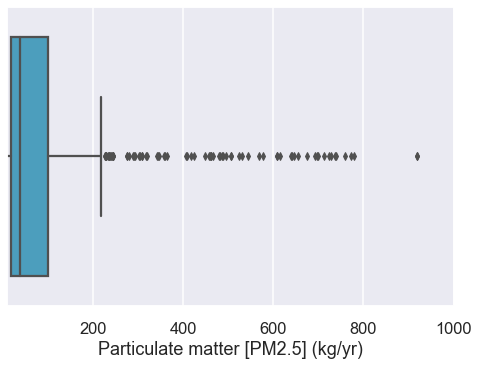

In [332]:
sns.boxplot(x=ds_ppm_tc_subset['Particulate matter [PM2.5] (kg/yr)'])
plt.xlim(10,1000)

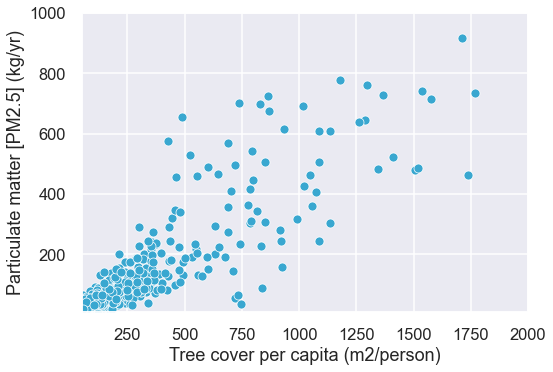

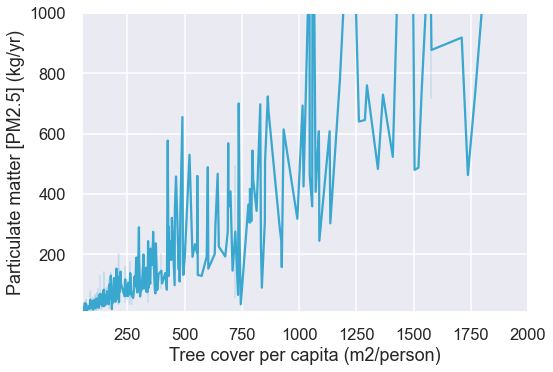

(50.0, 2000.0)

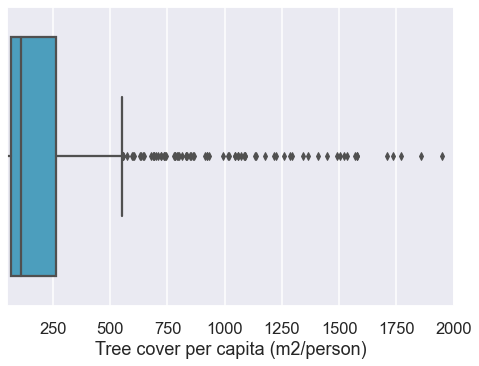

In [333]:
# There are some large outliers. Select values to narrow in on data.
sns.scatterplot(data=ds_ppm_tc_subset, x='Tree cover per capita (m2/person)', y='Particulate matter [PM2.5] (kg/yr)')
plt.xlim(50,2000)
plt.ylim(10,1000)
plt.show()

sns.lineplot(data=ds_ppm_tc_subset, x='Tree cover per capita (m2/person)', y='Particulate matter [PM2.5] (kg/yr)')
plt.xlim(50,2000)
plt.ylim(10,1000)
plt.show()

sns.boxplot(x=ds_ppm_tc_subset['Tree cover per capita (m2/person)'])
plt.xlim(50,2000)

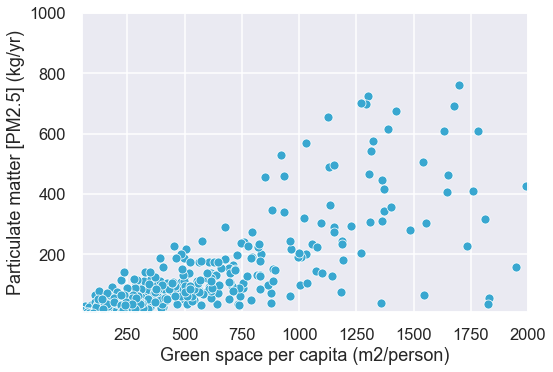

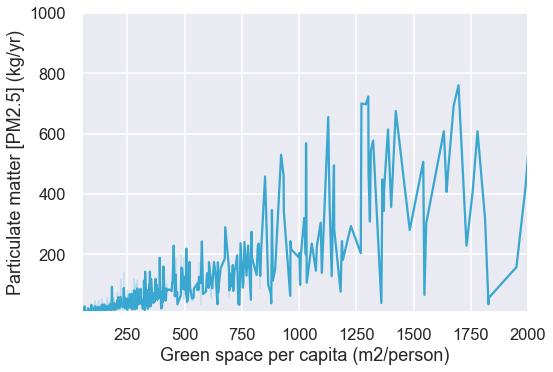

(50.0, 2000.0)

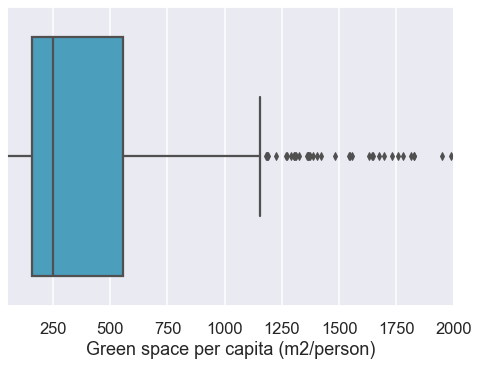

In [334]:
# There are some large outliers. Select values to narrow in on data.
sns.scatterplot(data=ds_ppm_tc_subset, x='Green space per capita (m2/person)', y='Particulate matter [PM2.5] (kg/yr)')
plt.xlim(50,2000)
plt.ylim(10,1000)
plt.show()

sns.lineplot(data=ds_ppm_tc_subset, x='Green space per capita (m2/person)', y='Particulate matter [PM2.5] (kg/yr)')
plt.xlim(50,2000)
plt.ylim(10,1000)
plt.show()

sns.boxplot(x=ds_ppm_tc_subset['Green space per capita (m2/person)'])
plt.xlim(50,2000)

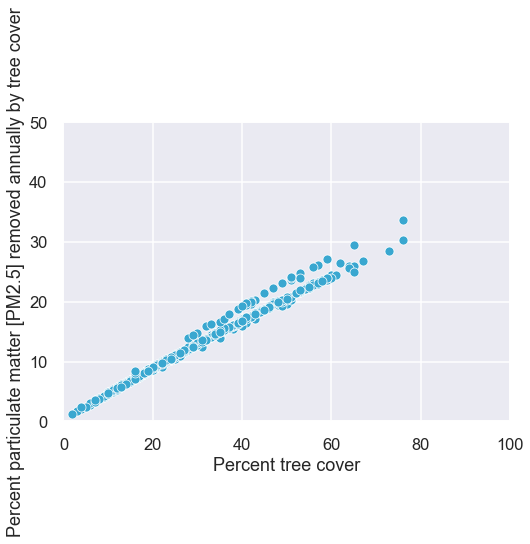

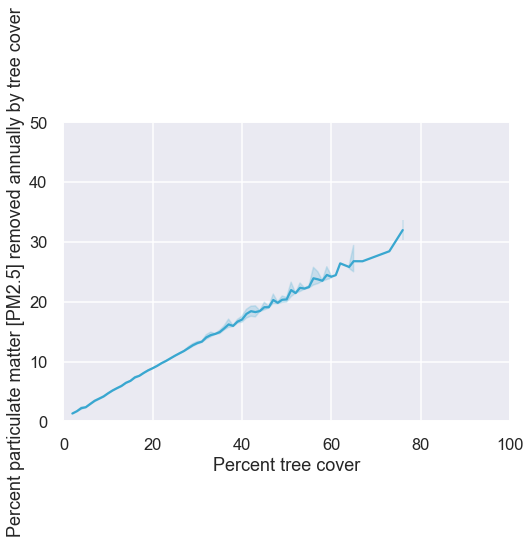

In [335]:
sns.scatterplot(data=ds_ppm_tc_subset, x='Percent tree cover', y='Percent particulate matter [PM2.5] removed annually by tree cover')
plt.xlim(0,100)
plt.ylim(0,50)
plt.show()

sns.lineplot(data=ds_ppm_tc_subset, x='Percent tree cover', y='Percent particulate matter [PM2.5] removed annually by tree cover')
plt.xlim(0,100)
plt.ylim(0,50)
plt.show()

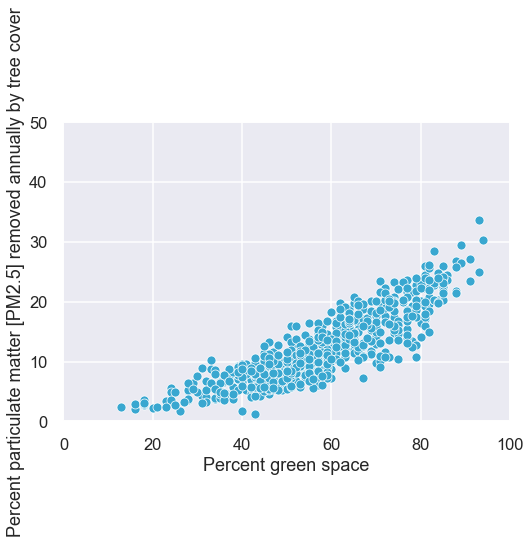

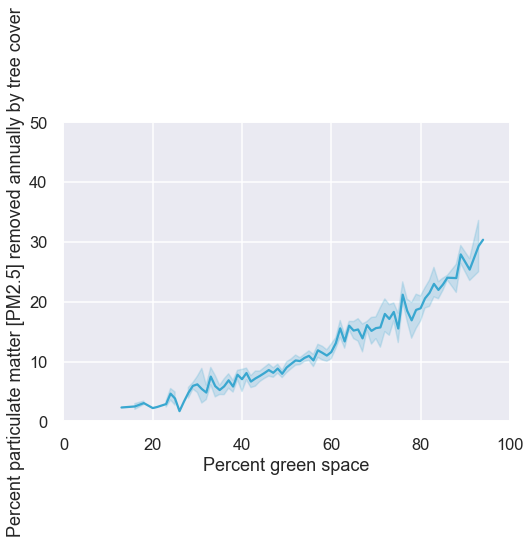

In [336]:
sns.scatterplot(data=ds_ppm_tc_subset, x='Percent green space', y='Percent particulate matter [PM2.5] removed annually by tree cover')
plt.xlim(0,100)
plt.ylim(0,50)
plt.show()

sns.lineplot(data=ds_ppm_tc_subset, x='Percent green space', y='Percent particulate matter [PM2.5] removed annually by tree cover')
plt.xlim(0,100)
plt.ylim(0,50)
plt.show()

So there's an absolute linear relationship between Percent tree cover and Percent PM2.5 removed annually by tree cover, as well as a linear relationship between Percent green space and Percent PM2.5 removed annually by tree cover. Again, this data is for Cleveland, OH. Our next goal is to look data for Los Angeles, New York, and Tampa.

In [337]:
print('Max :',np.max(ds_ppm_tc_subset,axis=1))

Max : 0       1377.0
1       1378.0
2       1380.0
3       1386.0
4       1387.0
        ...   
707     2749.0
708     2759.0
709     3081.0
710     5583.0
711    14222.0
Length: 712, dtype: float64


In [338]:
print('Min :',np.min(ds_ppm_tc_subset,axis=1))

Min : 0       6.482193
1       8.962997
2       2.751959
3       4.310901
4       8.867287
         ...    
707    17.968437
708    23.993467
709    25.773998
710    25.029505
711    30.381317
Length: 712, dtype: float64


In [339]:
# save the data to a new csv file

ds_ppm_tc_subset.to_csv('ds_ppm_tc_subset', index=False)

In [341]:
pm25_df_1.to_csv('pm25_df_1', index=False)

In [342]:
pm25_df_2.to_csv('pm25_df_2', index=False)

In [ ]:
aqi_df.to_csv('aqi_df', index=False)

In [343]:
ds_ppm_analysis.to_csv('ds_ppm_analysis', index=False)